# Title of the project: **Surviving Airplane Disasters**

#Problem Statement:
 

*   Applying k-means clustering in order to separate airplane crashes into groups of crashes with high survival rates and crashes with high fatalities.
*   To explore & discover the possible differences between survivable crashes and fatal crashes.



#Data Description :
This dataset includes:

* All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in fatal accidents.
* All cargo, positioning, ferry and test flight fatal accidents.
* All military transport accidents with 10 or more fatalities.
* All commercial and military aviation accidents with greater than 10 fatalities.
* All civil and military accidents involving fatalities.
* Aviation accidents involving the death of famous people.
* Aviation accidents or incidents of noteworthy interest.


#Software Requirements and Platforms used:
* R Programming Language
* Colab R


# CO1 : Know your Data



The data has 5268 records with 13 variables.

Scale of Measurements of variables:
* Date: Date of accident  -  **Categorical Nominal**
* Time: Local time, in 24 hr. in the format hh:mm - **Quantitative Coninuous**
* Location: Location of the accident - **Categorical Nominal**
* Operator: Airline or operator of the aircraft - **Categorical Nominal**
* Flight: Flight number assigned by the aircraft operator - **Quantitative Discrete**
* Route: Complete or partial route flown prior to the accident - **Categorical Nominal**
* Type: Aircraft type - **Categorical Nominal** 
* Registration: ICAO registration of the aircraft - **Categorical Nominal**
* cn/In: Construction or serial number / Line or fuselage number - **Categorical Nominal**
* Aboard: Total people aboard - **Quantitative Discrete**
* Fatalities: Total fatalities aboard - **Quantitative discrete**
* Ground: Total killed on the ground - **Quantitative discrete**
* Summary: Brief description of the accident and cause if known - **Descriptive**





In [ ]:
install.packages("rapportools")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘reshape’, ‘plyr’, ‘pander’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘jquerylib’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
# Libraries to import

library ("readr")
library("tidyverse")
library("lubridate")
library("rapportools")
library("ggplot2")
library("repr")
library("RColorBrewer")
library("factoextra")
library("gridExtra")
library("cluster")
library("plyr")
library("dplyr")
library("DT")

In [ ]:
#Quick look at what the data contains

AirCrash=read.csv("/content/sample_data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
head(AirCrash,10)

,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Summary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,,Demonstration,Wright Flyer III,,1,2,1,0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
2,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,,,5,5,0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
3,08/06/1913,,"Victoria, British Columbia, Canada",Private,-,,Curtiss seaplane,,,1,1,0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),,,20,14,0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),,,30,30,0,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."
6,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,,,Zeppelin L-8 (airship),,,41,21,0,Crashed into trees while attempting to land after being shot down by British and French aircraft.
7,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),,,19,19,0,"Exploded and burned near Neuwerk Island, when hydrogen gas, being vented, was ignited by lightning."
8,07/28/1916,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),,,20,20,0,"Crashed near the Black Sea, cause unknown."
9,09/24/1916,01:00,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),,,22,22,0,Shot down by British aircraft crashing in flames.


In [ ]:
#Structure of the Dataset
str(AirCrash)

'data.frame':	3845 obs. of  13 variables:
 $ Date        : chr  "09/17/1908" "07/12/1912" "08/06/1913" "09/09/1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a heig"| __truncated__ "First

# CO2: Data Wrangling

In [ ]:
#Data Inspection & Cleaning!

# Check for duplicated data
print(paste('Total duplicated rows: ',nrow(AirCrash[duplicated(AirCrash),])))

# Check for data for NA fields
print(paste("Total AirCrash NA's: ",sum(is.na(AirCrash))))

# List Null Values
Null_Values <- (sapply(AirCrash,function(x) sum(is.na(x))))
t(data.frame(Null_Values))

[1] "Total duplicated rows:  0"
[1] "Total AirCrash NA's:  53"


,Date,Time,Location,Operator,Flight..,Route,Type,Registration,cn.In,Aboard,Fatalities,Ground,Summary
Null_Values,0,0,0,0,0,0,0,0,0,21,12,20,0


In [ ]:
#Inspect planes with missing Aboard values

AirCrash[is.empty(AirCrash$Aboard),c(1,4,5,7,10,11,12)]

,Date,Operator,Flight..,Type,Aboard,Fatalities,Ground
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
27,10/20/1919,Aircraft Transport and Travel,,De Havilland DH-4,NA,NA,NA
334,08/10/1934,China National Aviation Corporation,,Sikorsky S-38B,NA,NA,NA
349,03/07/1935,Deruluft,,Rochrbach Roland,NA,3,0
365,08/13/1935,China National Aviation Corporation,,Sikorsky S-38B,NA,NA,NA
424,12/26/1936,China National Aviation Corporation,,Douglas DC-2,NA,NA,NA
527,09/26/1939,KLM Royal Dutch Airlines,,Douglas DC-3,NA,1,0
538,07/07/1940,Air France,,Dewoitine D-338,NA,NA,NA
571,01/24/1942,KNILM,,Douglas DC-3,NA,NA,NA
572,01/26/1942,KNILM,,Grumman G-21 Goose,NA,NA,NA


In [ ]:
# Keep all records where Aboard values are not NA
AirCrash <- AirCrash[!is.empty(AirCrash$Aboard),]
# Convert Ground NA values to 0
AirCrash$Ground[is.na(AirCrash$Ground)] <- 0
# Check dimensions to make sure 22 records have been dropped (5268-24 = 5244)
dim(AirCrash)
# Confirm there are no NA values in data
print(paste("Total NA values: ",sum(is.na(AirCrash))))


[1] 3822   13

[1] "Total NA values:  0"


In [ ]:
# Check for empty spaces "" as input fields
Missing_Values <- (sapply(AirCrash,function(x) sum(x=="")))
(data.frame(Missing_Values))

,Missing_Values
,<int>
Date,0
Time,1875
Location,13
Operator,15
Flight..,3153
Route,1458
Type,22
Registration,260
cn.In,1088


## Data Transformations:

In [ ]:
# Convert Date field data type from factor to date.
AirCrash$Date <- as.Date(AirCrash$Date, format = "%m/%d/%Y")
# Convert Time field data type from factor to time
AirCrash$LocalTime <- as.POSIXct(AirCrash$Time, format = "%H:%M")

# check if any format changes created NA values
print(paste("Total Date NA's: ",sum(is.na(AirCrash$Date))))
print(paste("Total LocalTime NA's: ",sum(is.na(AirCrash$LocalTime))))

[1] "Total Date NA's:  0"
[1] "Total LocalTime NA's:  1886"


In [ ]:
# Add column LocalHour represented as a 24 hour clock in numeric format.
AirCrash$LocalHour <- as.numeric(format(AirCrash$LocalTime,"%H"))

# Temporarily replace Local Hour NA's with 25 to enable cut function
AirCrash$LocalHour <- ifelse(is.na(AirCrash$LocalHour), 25, AirCrash$LocalHour)
# Add discretized dayparts based on Local Hour
AirCrash$Daypart <- cut(AirCrash$LocalHour, breaks = c(-1,5,11,17,24,25),
                              labels = c("Overnight", "Morning","Afternoon","Night", "Unknown"))
#Reset NA's in Local Hour
AirCrash$LocalHour <- ifelse(AirCrash$LocalHour == 25,NA,AirCrash$LocalHour)

# Check first 15 records to see if bins are correctly labeled
head(AirCrash[,15:16],15)
# Check for NA values
print(paste("Total LocalHour NA's: ",sum(is.na(AirCrash$LocalHour))))
print(paste("Total Daypart NA's: ", sum(is.na(AirCrash$Daypart))))


,LocalHour,Daypart
,<dbl>,<fct>
1,17,Afternoon
2,6,Morning
3,NA,Unknown
4,18,Night
5,10,Morning
6,1,Overnight
7,15,Afternoon
8,NA,Unknown
9,1,Overnight


[1] "Total LocalHour NA's:  1886"
[1] "Total Daypart NA's:  0"


In [ ]:
# lubridate package was utilized to extract Year and Month from Date as their own columns
AirCrash$Year <- (year(AirCrash$Date))
AirCrash$Month <- (month(ymd(AirCrash$Date), label = TRUE))
# check column and check for NA's
head(AirCrash[c("Date","Year", "Month")],3)
print(paste("Total Year NA's: ", sum(is.na(AirCrash$Year))))
print(paste("Total Month NA's: ", sum(is.na(AirCrash$Month))))

,Date,Year,Month
,<date>,<dbl>,<ord>
1,1908-09-17,1908,Sep
2,1912-07-12,1912,Jul
3,1913-08-06,1913,Aug


[1] "Total Year NA's:  0"
[1] "Total Month NA's:  0"


In [ ]:
# Adding Survivors
AirCrash$Survivors <- AirCrash$Aboard - AirCrash$Fatalities
# Adding Survival Rate
AirCrash$SurvivalRate <- AirCrash$Survivors/AirCrash$Aboard

str(AirCrash)

'data.frame':	3822 obs. of  20 variables:
 $ Date        : Date, format: "1908-09-17" "1912-07-12" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a heig"| __truncated__ "First U.S. dirigible A

# CO3: Data Modeling and Analysis


#Exploratory Data Analysis (EDA)





In [ ]:
#Summary output provided for full list of stats.
summary(AirCrash)

      Date                Time             Location           Operator        
 Min.   :1908-09-17   Length:3458        Length:3458        Length:3458       
 1st Qu.:1951-04-25   Class :character   Class :character   Class :character  
 Median :1966-01-26   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1963-08-17                                                           
 3rd Qu.:1976-08-28                                                           
 Max.   :1991-02-22                                                           
                                                                              
   Flight..            Route               Type           Registration      
 Length:3458        Length:3458        Length:3458        Length:3458       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                            

##Preliminary Exploratory Data Analysis (EDA)
* Let's begin exploring the data with a simple examination of the number of crashes per year

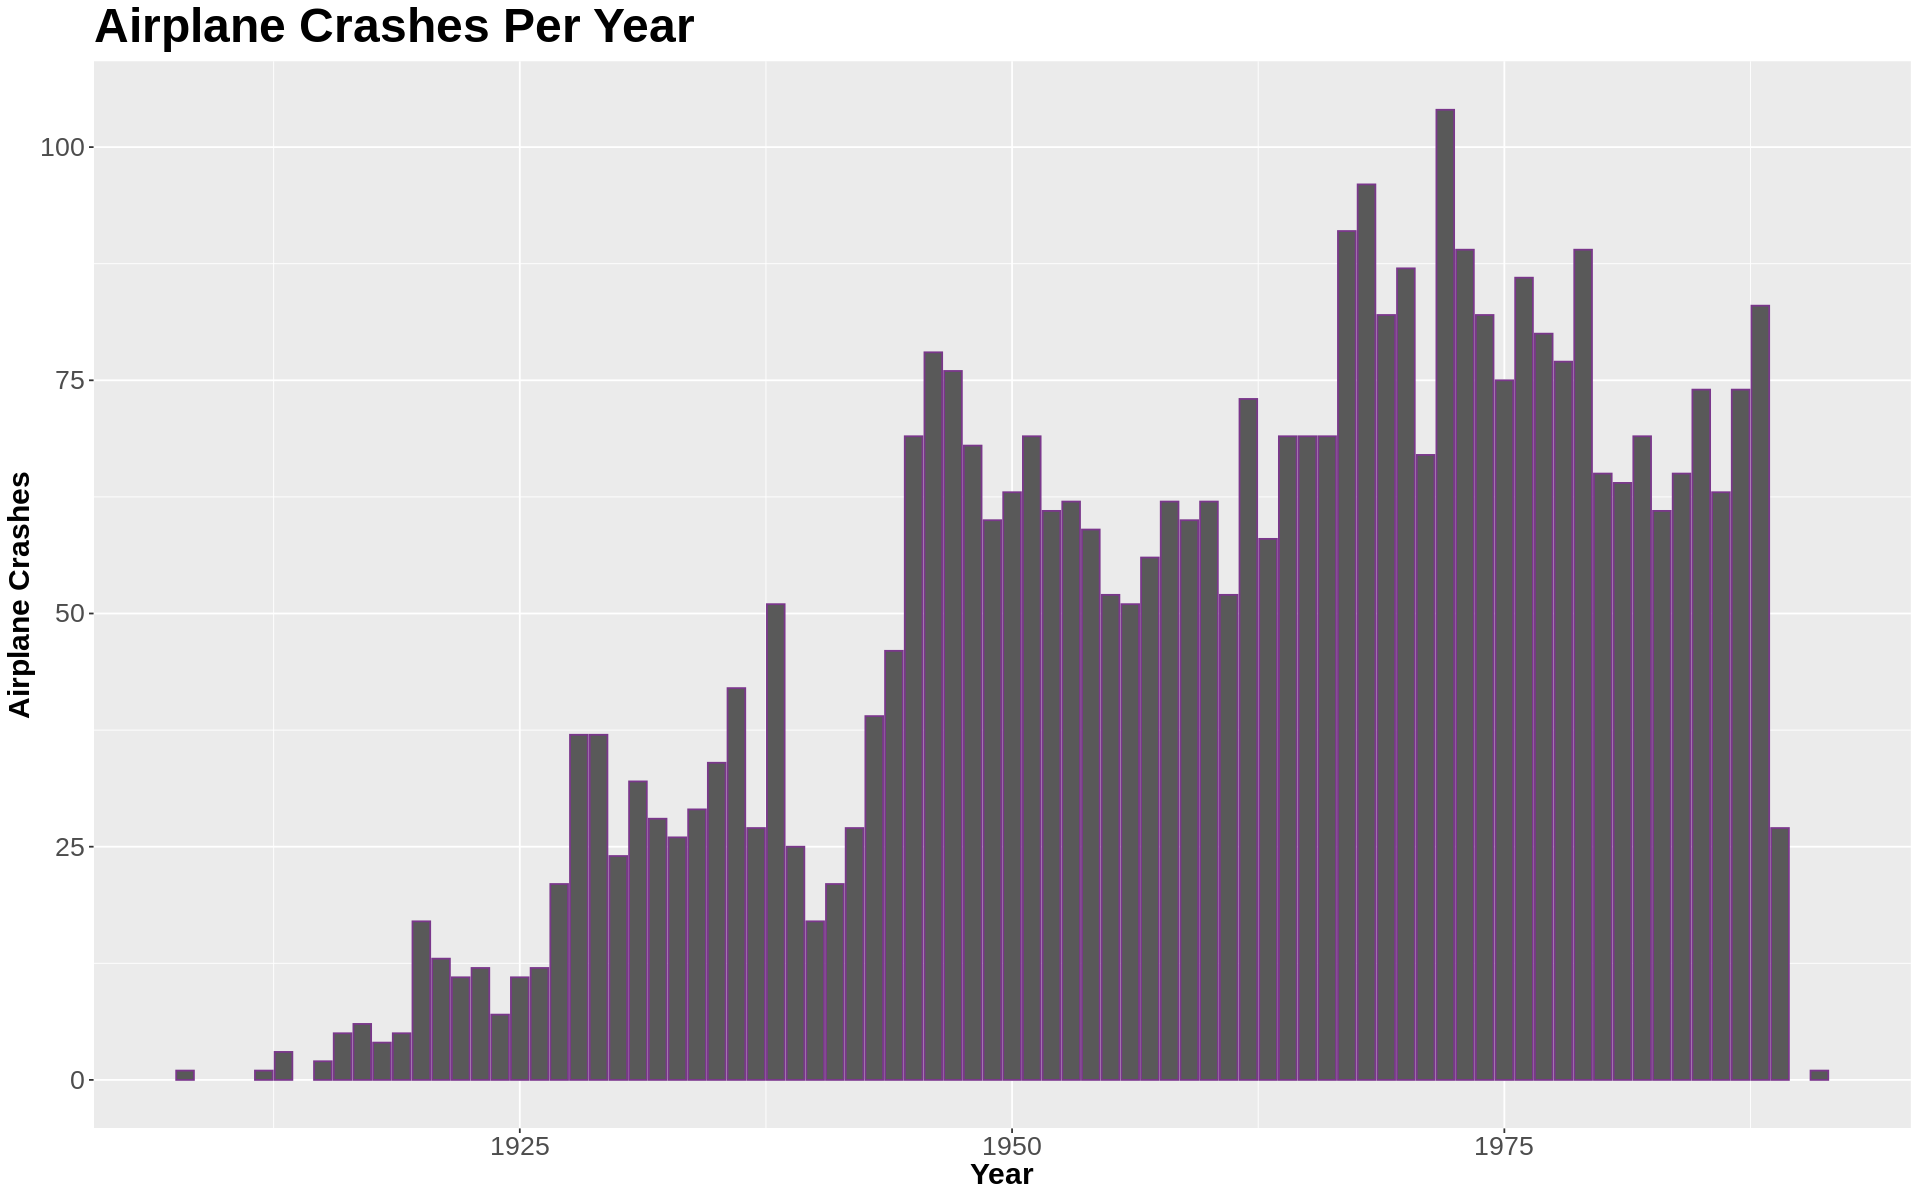

In [ ]:
# Create function to format chart size
fg <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

# Create consistent chart theme for font sizes
ATheme <- theme(title = element_text(size = 24, face = 'bold'),
                axis.title = element_text(size = 18),
                axis.text = element_text(size = 16),
               legend.text = element_text(size = 16))

# Plot number of Airplane Crashes Per Year
fg(16,10)
CrashesPerYear = ggplot(AirCrash, aes(x=Year)) + geom_bar (colour = "mediumorchid4") + 
  xlab("Year") + ylab("Airplane Crashes") + ggtitle("Airplane Crashes Per Year") + ATheme
CrashesPerYear

In [ ]:
# Aggregate the Travelers Aboard, Survivors and Fatalities by Year
AC <- rbind(Survivors = aggregate(AirCrash$Survivors,by=list(AirCrash$Year),FUN =sum),
            Aboard = aggregate(AirCrash$Aboard,by=list(AirCrash$Year),FUN =sum),
            Fatalities = aggregate(AirCrash$Fatalities, by = list(AirCrash$Year), FUN = sum))

# Some formatting and cleaning for charting.
AC$Travelers <- rownames(AC)
AC$Travelers <- gsub("[.].*","",AC$Travelers)
AC <- AC %>% dplyr::rename(Year = Group.1, Count = x)

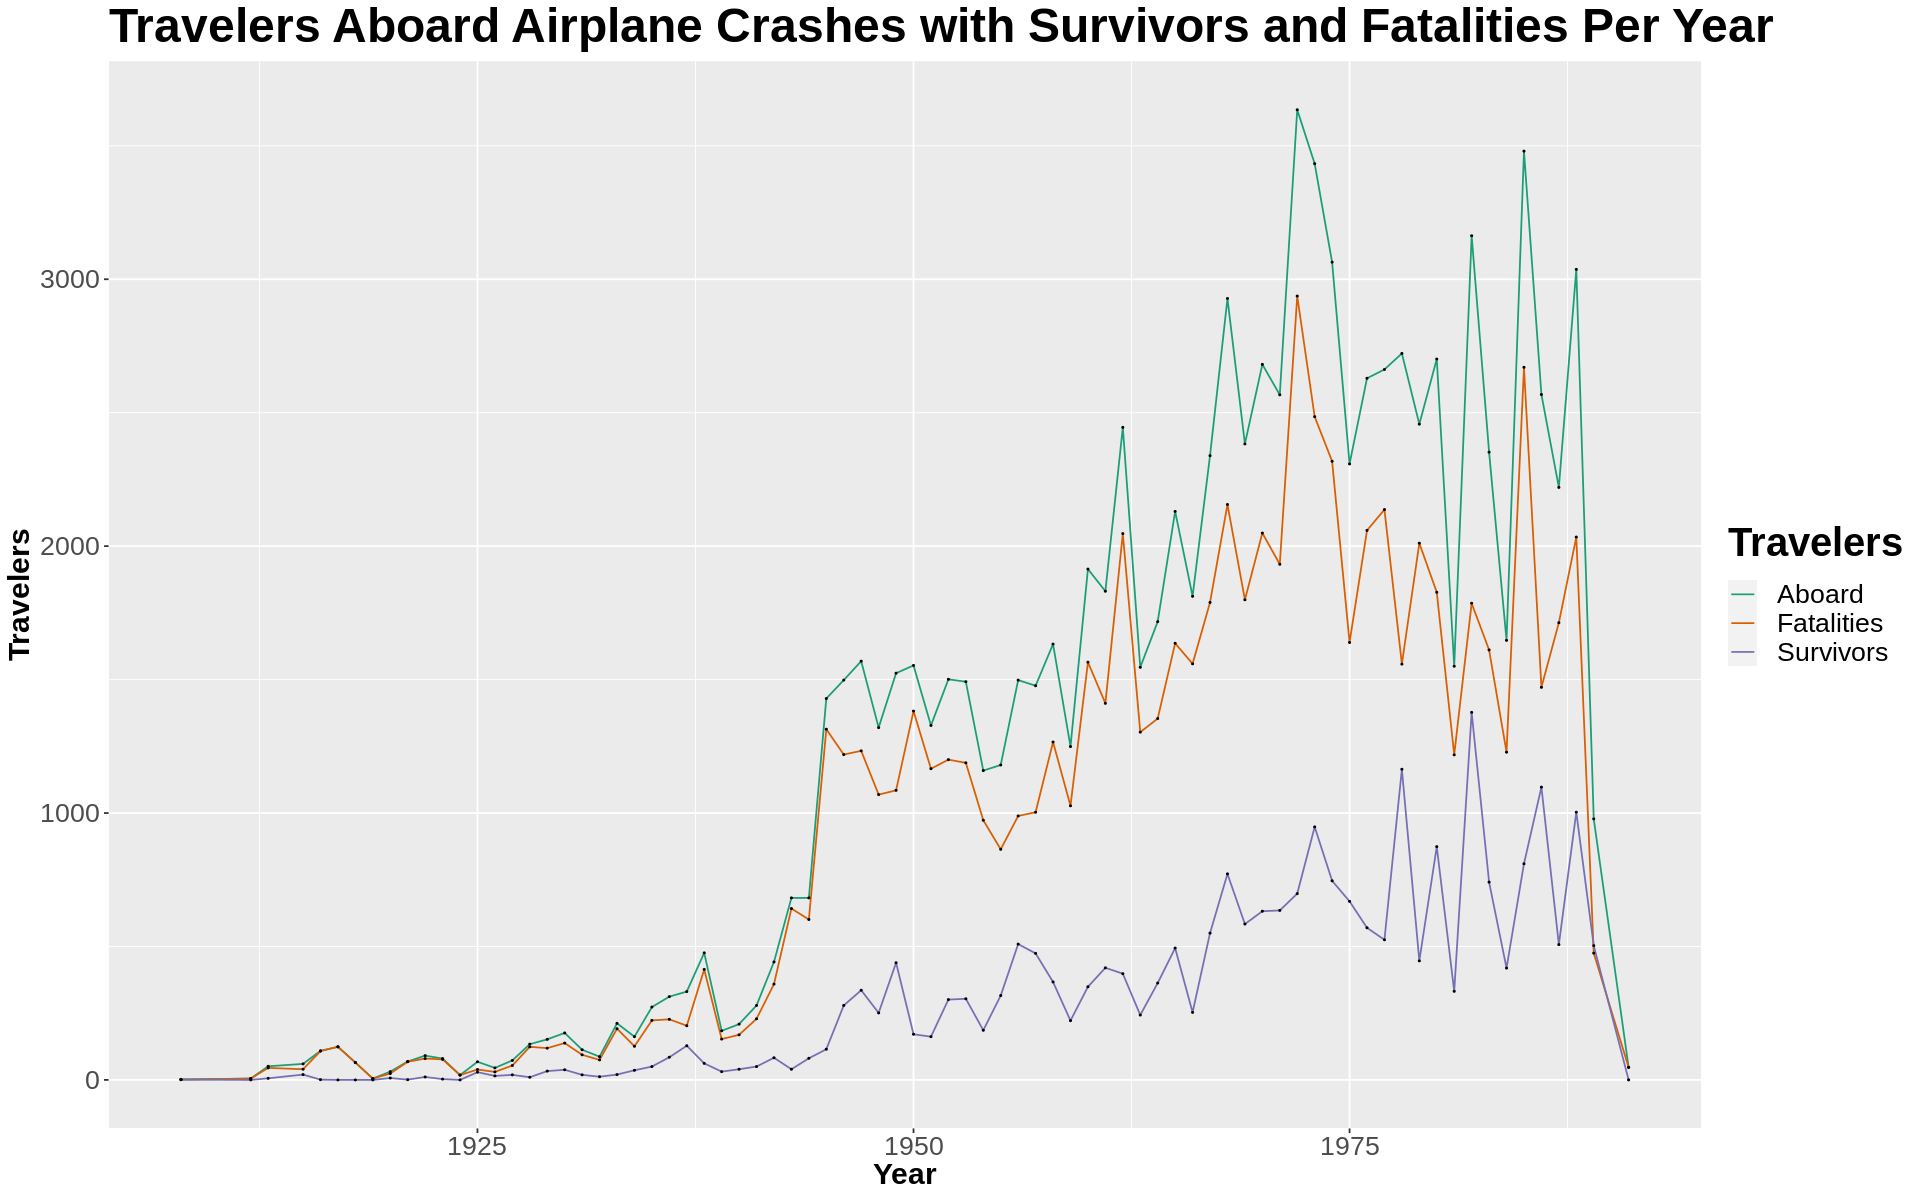

In [ ]:
# Plot the number of Travelers Aboard, Survivors and Fatalities by Year
fg(16,10)
TravelersPerYear = ggplot(AC, aes(x=Year, y=Count, group = Travelers )) +
                   geom_line(aes(colour=Travelers))  + geom_point(size = 0.2) +
                    scale_colour_brewer (palette = "Dark2", labels = c("Aboard", "Fatalities", "Survivors"))+
                    xlab("Year") + ylab("Travelers") + ATheme +
                    ggtitle("Travelers Aboard Airplane Crashes with Survivors and Fatalities Per Year")

TravelersPerYear

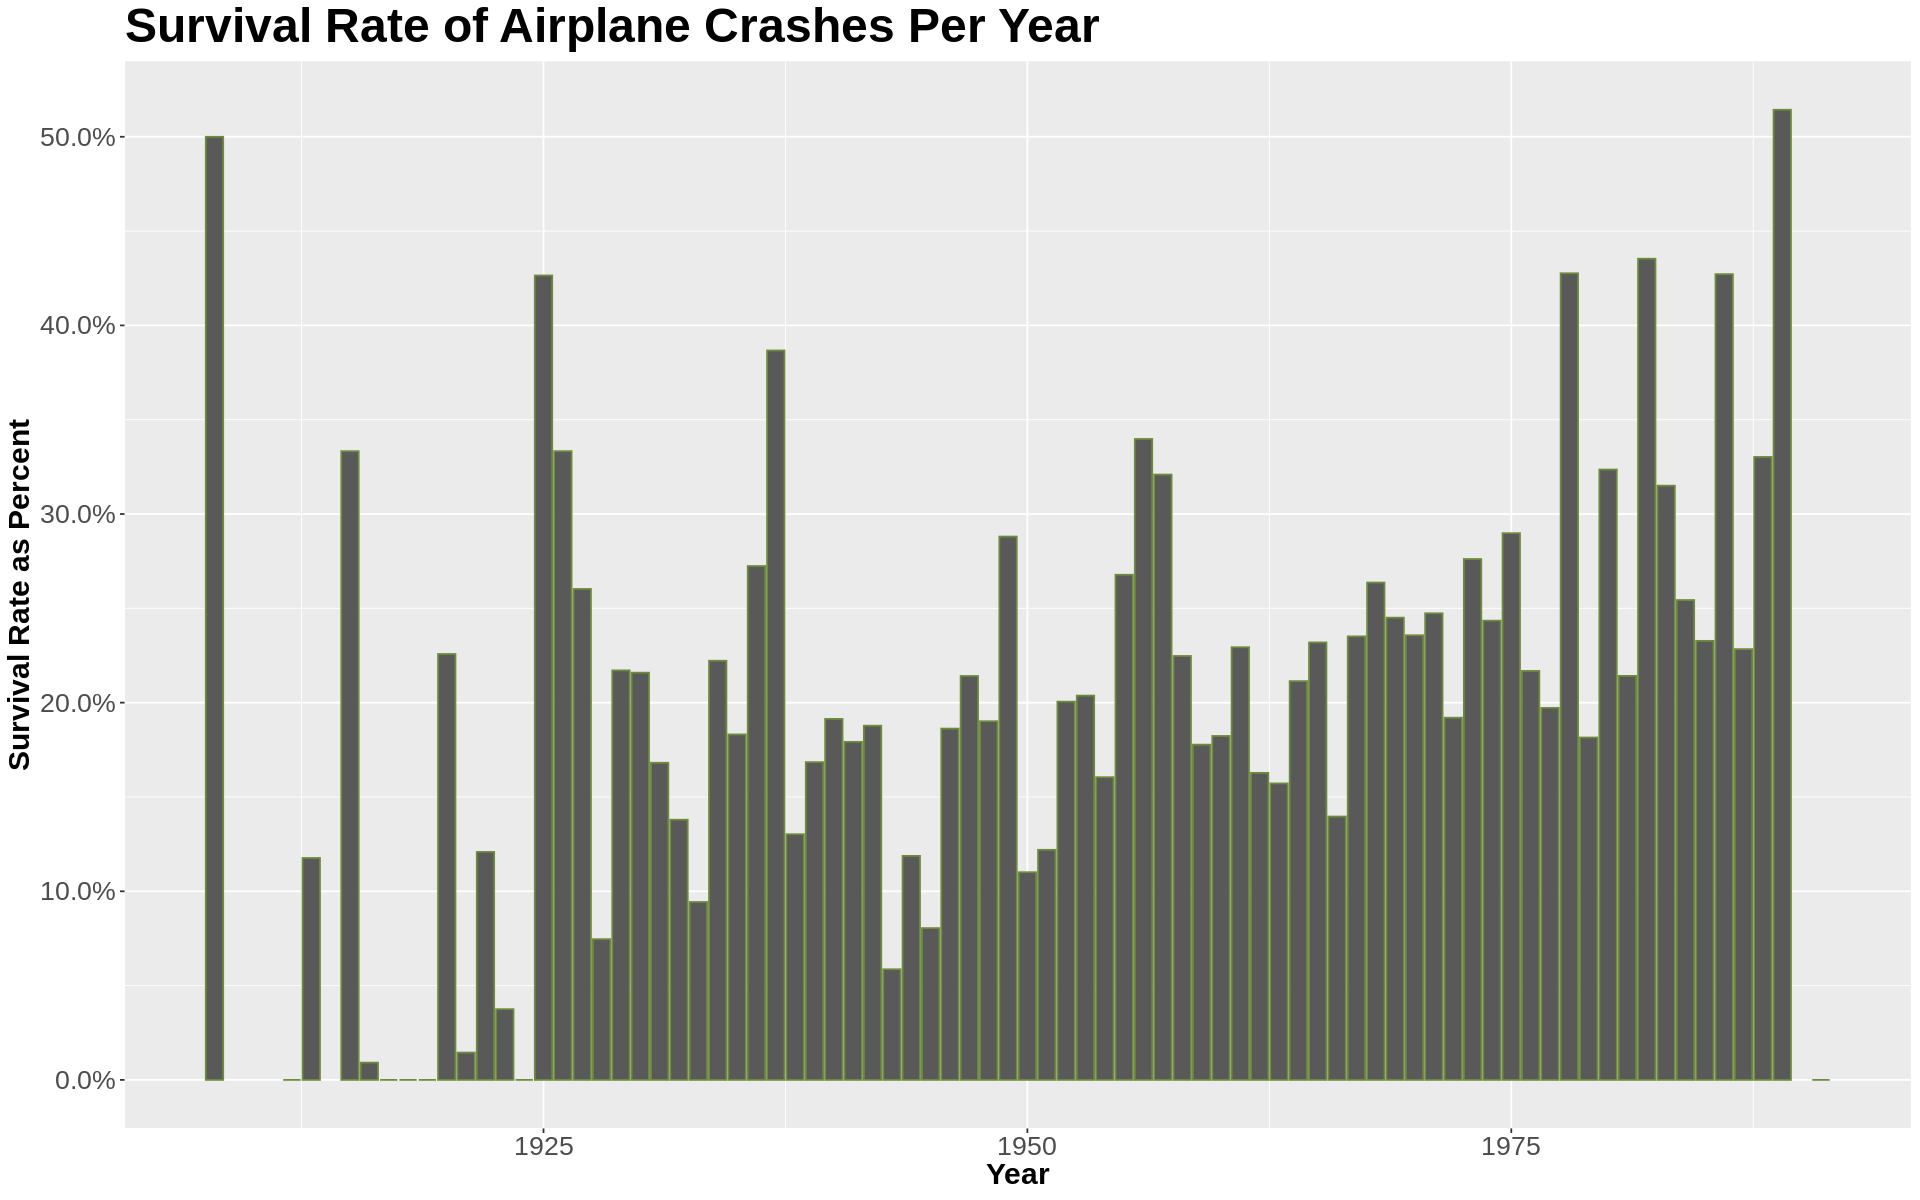

In [ ]:
# Aggregate Survival Rate per year for charting
AC2 <- cbind(Survivors = aggregate(AirCrash$Survivors,by=list(AirCrash$Year),FUN =sum),
            Aboard = aggregate(AirCrash$Aboard,by=list(AirCrash$Year),FUN =sum))

fg(16,10)
SurvivorsPerYear = ggplot(AC2, aes(x=Survivors.Group.1, y=Survivors.x/Aboard.x)) +  
    geom_col(colour = "darkolivegreen4") + 
    xlab("Year") + ylab("Survival Rate as Percent") + 
    ggtitle("Survival Rate of Airplane Crashes Per Year") + ATheme +
    scale_y_continuous(labels = scales::percent)
SurvivorsPerYear

# CO4: Mining Techniques in R

In [ ]:
# Preserve all Air Crashes in data set in AllAirCrash (in case needed later)
AllAirCrash <- AirCrash
# Print number of records with blank summaries
print(paste("Number of records with blank entries: ", nrow(AirCrash[AirCrash$Summary == "",])))
# Remove AirCrash data with blank summaries
AirCrash <- AirCrash[!AirCrash$Summary == "",]
# Inspect if removal was successful
print("After removing blank Summary records...")
print(paste("Number of Summary records with blank entries: ",nrow(AirCrash[AirCrash$Summary == "",])))

[1] "Number of records with blank entries:  364"
[1] "After removing blank Summary records..."
[1] "Number of Summary records with blank entries:  0"


In [ ]:
# Prep a data frame "AirClust" to contain the variables to be used for k-means clustering.

# Extract the key variables from AirCrash into a data frame AirClust.
AirClustx <- AirCrash[,c(10,11,19,20)] 
# Create binominal values by score years in AirScore
AirScore <- data.frame(Year = AirCrash$Year)
AirScore$Y1908_Y1929 <- ifelse(AirScore$Year > 1929,0,1)
AirScore$Y1930_Y1949 <- ifelse(between(AirScore$Year,1930,1949), 1,0 )
AirScore$Y1950_Y1969 <- ifelse(between(AirScore$Year,1950,1969), 1,0 )
AirScore$Y1970_Y1989 <- ifelse(between(AirScore$Year,1970,1989), 1,0 )
AirScore$Y1990_Y2009 <- ifelse(AirScore$Year > 1989 ,1,0)
# Bind AirScore binomial variables to AirClust
AirClust <- data.frame(AirClustx,AirScore[,-1])
head(AirClust)

,Aboard,Fatalities,Survivors,SurvivalRate,Y1908_Y1929,Y1930_Y1949,Y1950_Y1969,Y1970_Y1989,Y1990_Y2009
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,1,0.5000000,1,0,0,0,0
2,5,5,0,0.0000000,1,0,0,0,0
3,1,1,0,0.0000000,1,0,0,0,0
4,20,14,6,0.3000000,1,0,0,0,0
5,30,30,0,0.0000000,1,0,0,0,0
6,41,21,20,0.4878049,1,0,0,0,0


In [ ]:
str(AirClust)

'data.frame':	3458 obs. of  9 variables:
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Survivors   : int  1 0 0 6 0 20 0 0 0 0 ...
 $ SurvivalRate: num  0.5 0 0 0.3 0 ...
 $ Y1908_Y1929 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Y1930_Y1949 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Y1950_Y1969 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Y1970_Y1989 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Y1990_Y2009 : num  0 0 0 0 0 0 0 0 0 0 ...


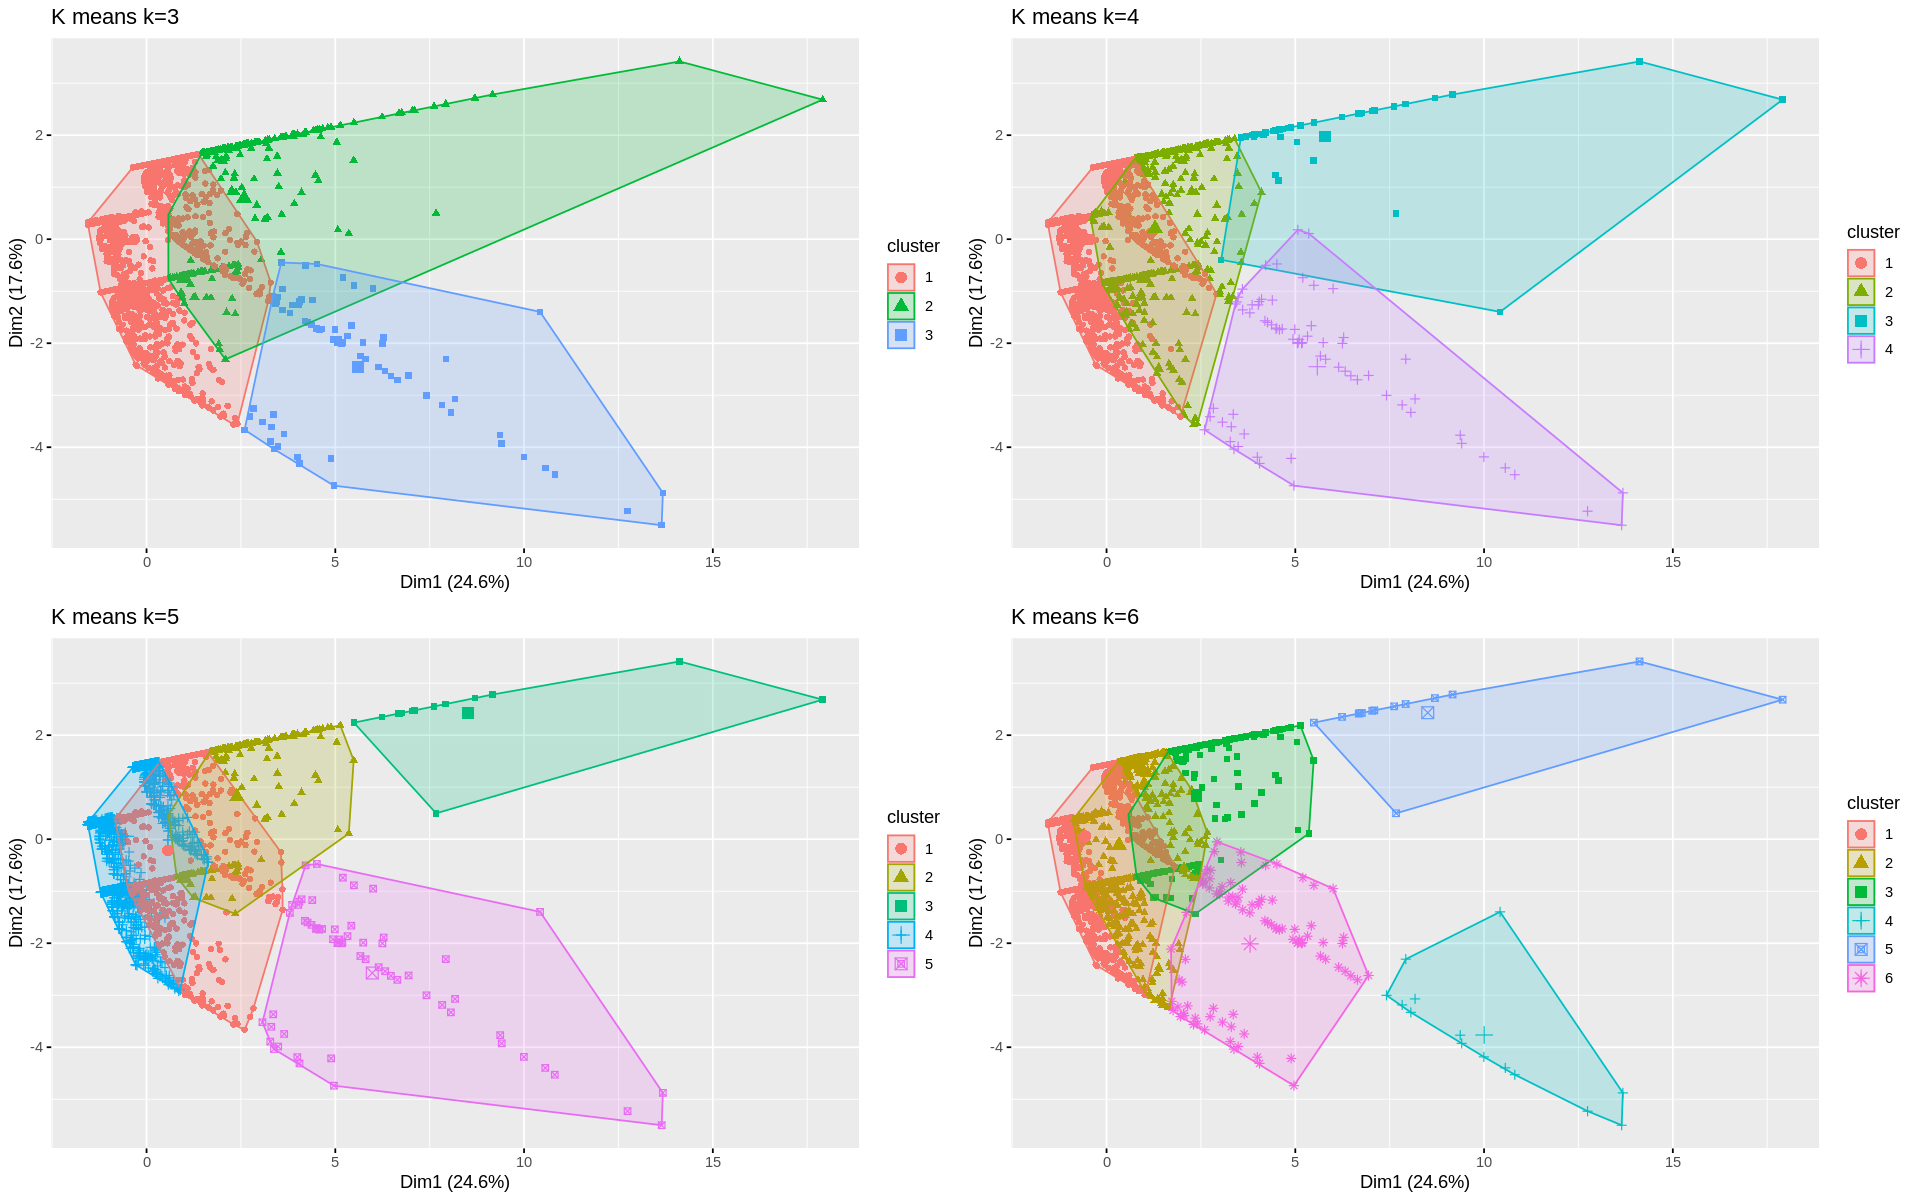

In [ ]:
# Initial test of clusters with k = (3, 4, 5, 6)
set.seed(23)
k1 <- kmeans(AirClust, centers = 3, nstart = 25)
k2 <- kmeans(AirClust, centers = 4, nstart = 25)
k3 <- kmeans(AirClust, centers = 5, nstart = 25)
k4 <- kmeans(AirClust, centers = 6, nstart = 25)


# Visualize the cluster results
p1 <- fviz_cluster(k1, geom = "point", data = AirClust) + ggtitle("K means k=3")
p2 <- fviz_cluster(k2, geom = "point", data = AirClust) + ggtitle("K means k=4")
p3 <- fviz_cluster(k3, geom = "point", data = AirClust) + ggtitle("K means k=5")
p4 <- fviz_cluster(k4, geom = "point", data = AirClust) + ggtitle("K means k=6")

grid.arrange(p1,p2,p3,p4)


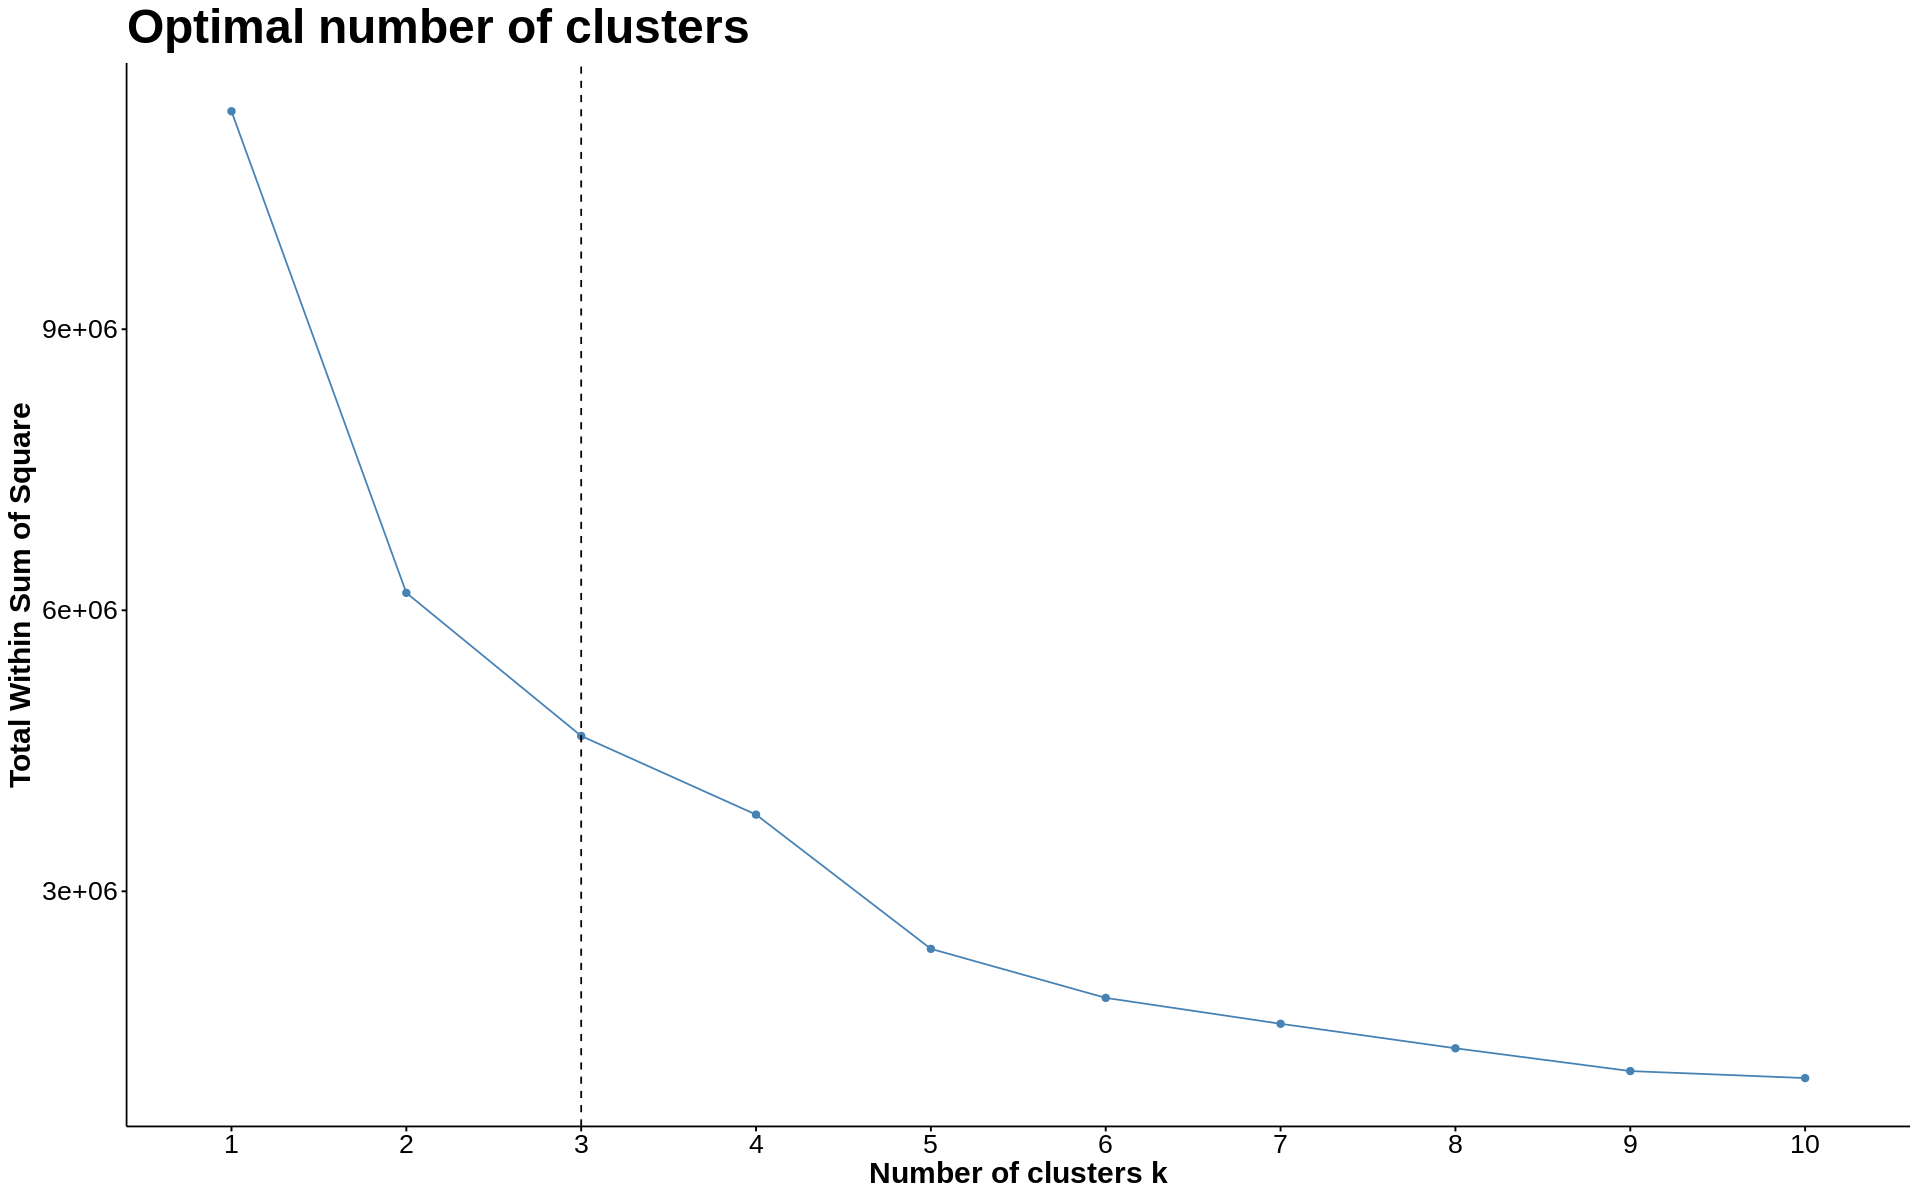

In [ ]:
# Plot Elbo Method
fviz_nbclust(AirClust, kmeans, method = "wss") + 
geom_vline(xintercept = 3, linetype = 2) + ATheme

In [ ]:
# Applying the resulting 3 clusters to airplane crash variables.
AirCrash <- data.frame(AirCrash,Cluster = k1$cluster)

In [ ]:
#Aggregating the mean values by Aboard, Fatalities, Survivors and Survival Rate.
# Minimum and Maximum aggregations were also made for Aboard.
AboardClust <- aggregate(AirCrash$Aboard, by=list(Cluster = AirCrash$Cluster),FUN = mean)
AboardClustx <- aggregate(AirCrash$Aboard, by=list(Cluster = AirCrash$Cluster),FUN = max)
AboardClustm <- aggregate(AirCrash$Aboard, by=list(Cluster = AirCrash$Cluster),FUN = min)
DeathClust <- aggregate(AirCrash$Fatalities, by=list(AirCrash$Cluster), FUN = mean)
SurviveClust <- aggregate(AirCrash$Survivors, by = list(AirCrash$Cluster), FUN = mean)
SRateClust <- aggregate(AirCrash$SurvivalRate, by = list(AirCrash$Cluster), FUN = mean)

# Binding the aggregated values into a data frame.
PCluster <- data.frame(cbind(Cluster =AboardClust$Cluster,
                             Plane_Crashes = k1$size,Max_Aboard = AboardClustx$x,
                             Min_Aboard =AboardClustm$x, Mean_Aboard = AboardClust$x,
                             Mean_Fatalities = DeathClust$x, Mean_Survivors = SurviveClust$x, 
                             Mean_SurvivalRate = SRateClust$x))

PCluster

Cluster,Plane_Crashes,Max_Aboard,Min_Aboard,Mean_Aboard,Mean_Fatalities,Mean_Survivors,Mean_SurvivalRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3145,88,1,18.37138,14.44674,3.924642,0.15497385
2,241,644,66,116.09129,110.09959,5.991701,0.05228164
3,72,394,84,156.86111,14.30556,142.555556,0.91018496


In [ ]:
SRateClust

Group.1,x
<int>,<dbl>
1,0.15497385
2,0.05228164
3,0.91018496


# CO5: Implementing case study in R : Describe the scenario taken for analysis 
##EDA on Crash Clusters
With the clusters defined and labeled, let's examine how these cluster groups are represented in the data.

In [ ]:
# Adding the Cluster names of MidSizeCrash, LargeSurvivors, LargeFatalities and SmallCrash as ClustID
AirCrash$ClustID <- ifelse(AirCrash$Cluster == 1, "Large Passenger High Survival", 
                    ifelse(AirCrash$Cluster == 2, "Large Passenger High Fatality", "Small-Midsize Crashes"))

##How are annual plane crashes represented by cluster?

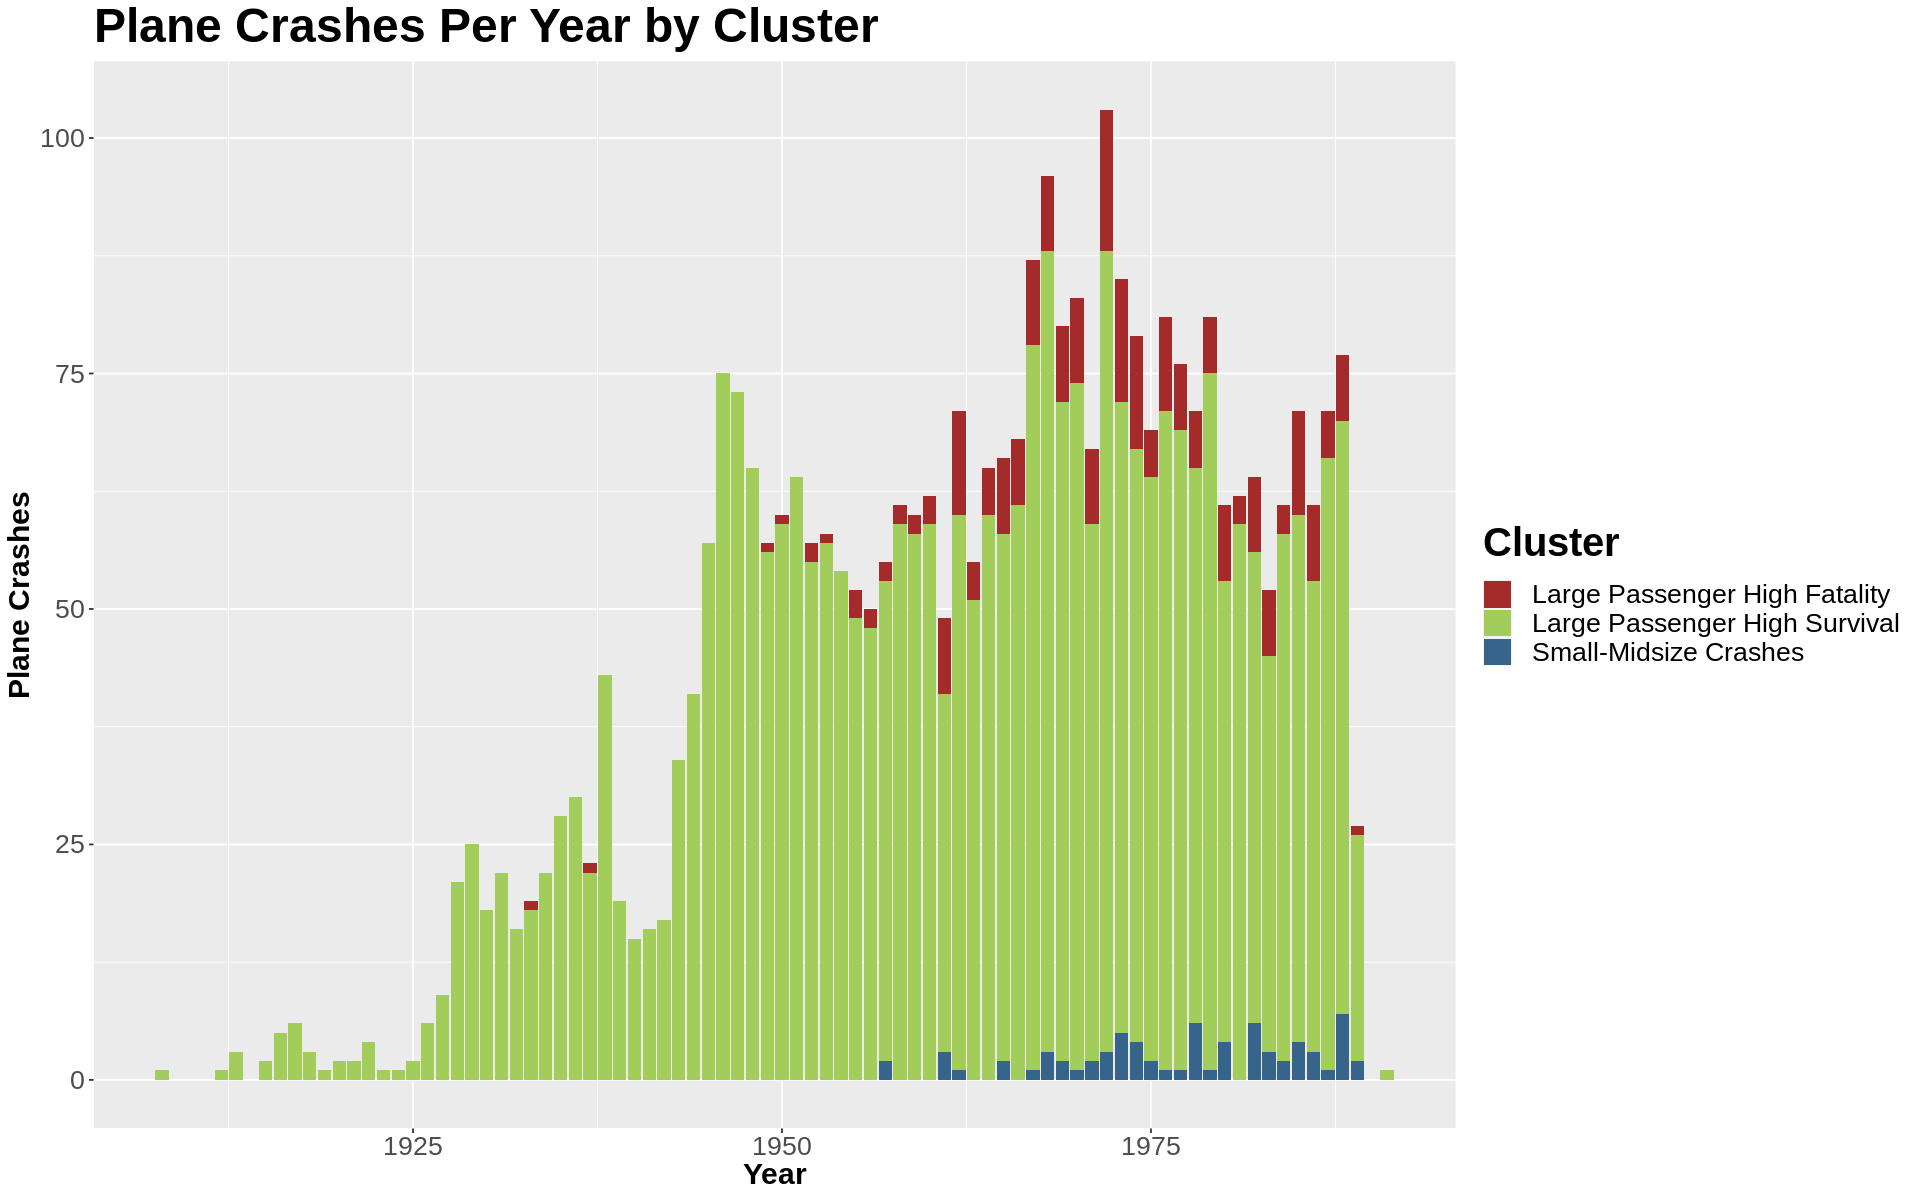

In [ ]:
# Plane Crashes Per Year by ClusterID
K1CrashPerYear <-  ggplot(AirCrash, aes(x=Year, fill = ClustID)) + geom_bar() + 
  xlab("Year") + ylab("Plane Crashes") + ggtitle("Plane Crashes Per Year by Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("brown","darkolivegreen3","steelblue4"))) + ATheme

K1CrashPerYear


#How many travelers were aboard these crashes by year and cluster ?

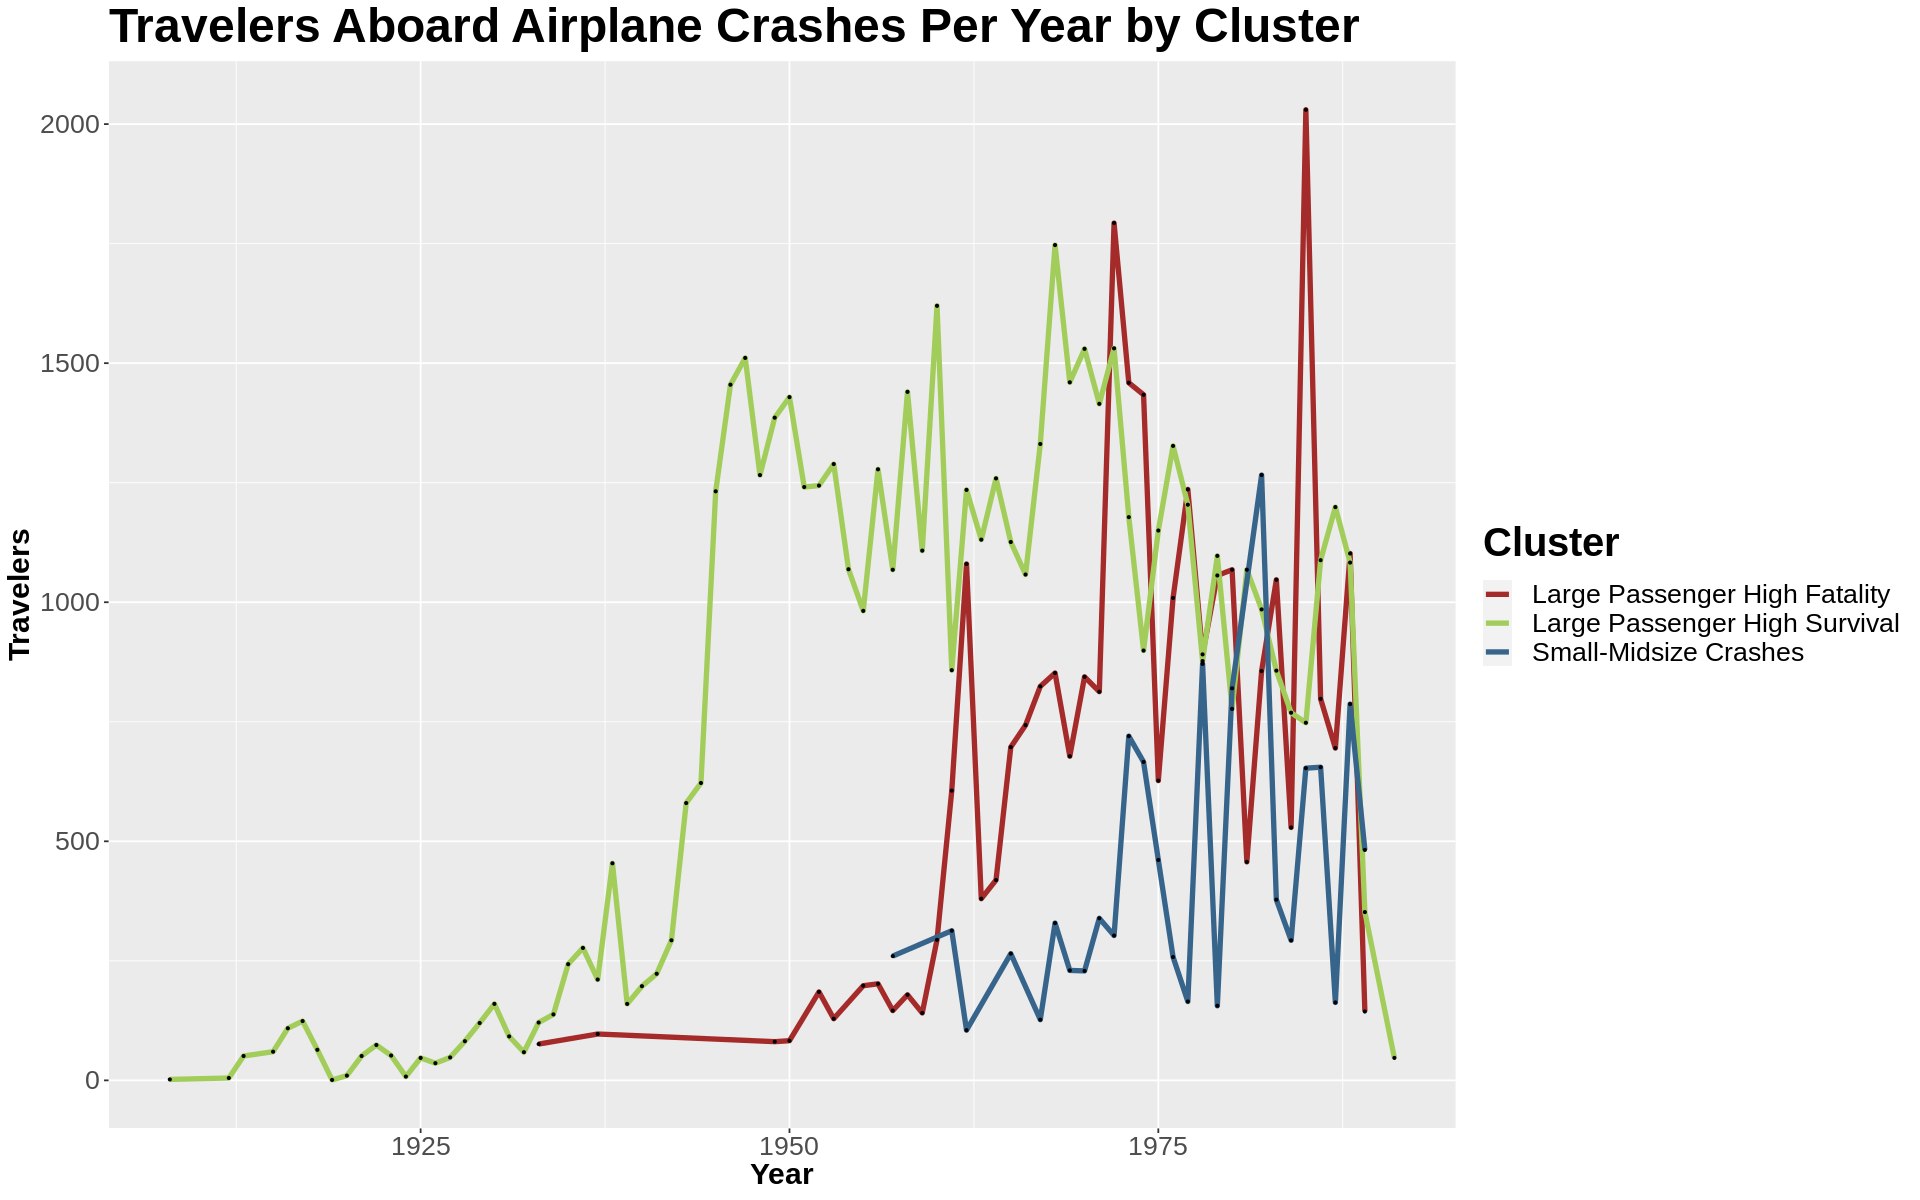

In [ ]:
# Aggregate Travelers Aboard Crashes per Year by Cluster groups
Aboard <- aggregate(AirCrash$Aboard,by=list(AirCrash$Year,AirCrash$ClustID),FUN =sum)
Aboard <- Aboard %>% dplyr::rename(Year = Group.1, ClusterID = Group.2, Travelers = x)

# Plot Travelers Aboard per Year by Cluster
fg(16,10)
K1TravelersPerYear = ggplot(Aboard, aes(x=Year, y=Travelers, group = ClusterID)) +
                   geom_line(aes(colour=ClusterID), size = 1.5)  + geom_point(size = 0.5) +
                    scale_color_manual( "Cluster", values = alpha(c("brown","darkolivegreen3","steelblue4")))+
                    xlab("Year") + ylab("Travelers") + ATheme +
                    ggtitle("Travelers Aboard Airplane Crashes Per Year by Cluster")

K1TravelersPerYear

#What are the annual plane crash fatalities by cluster ?

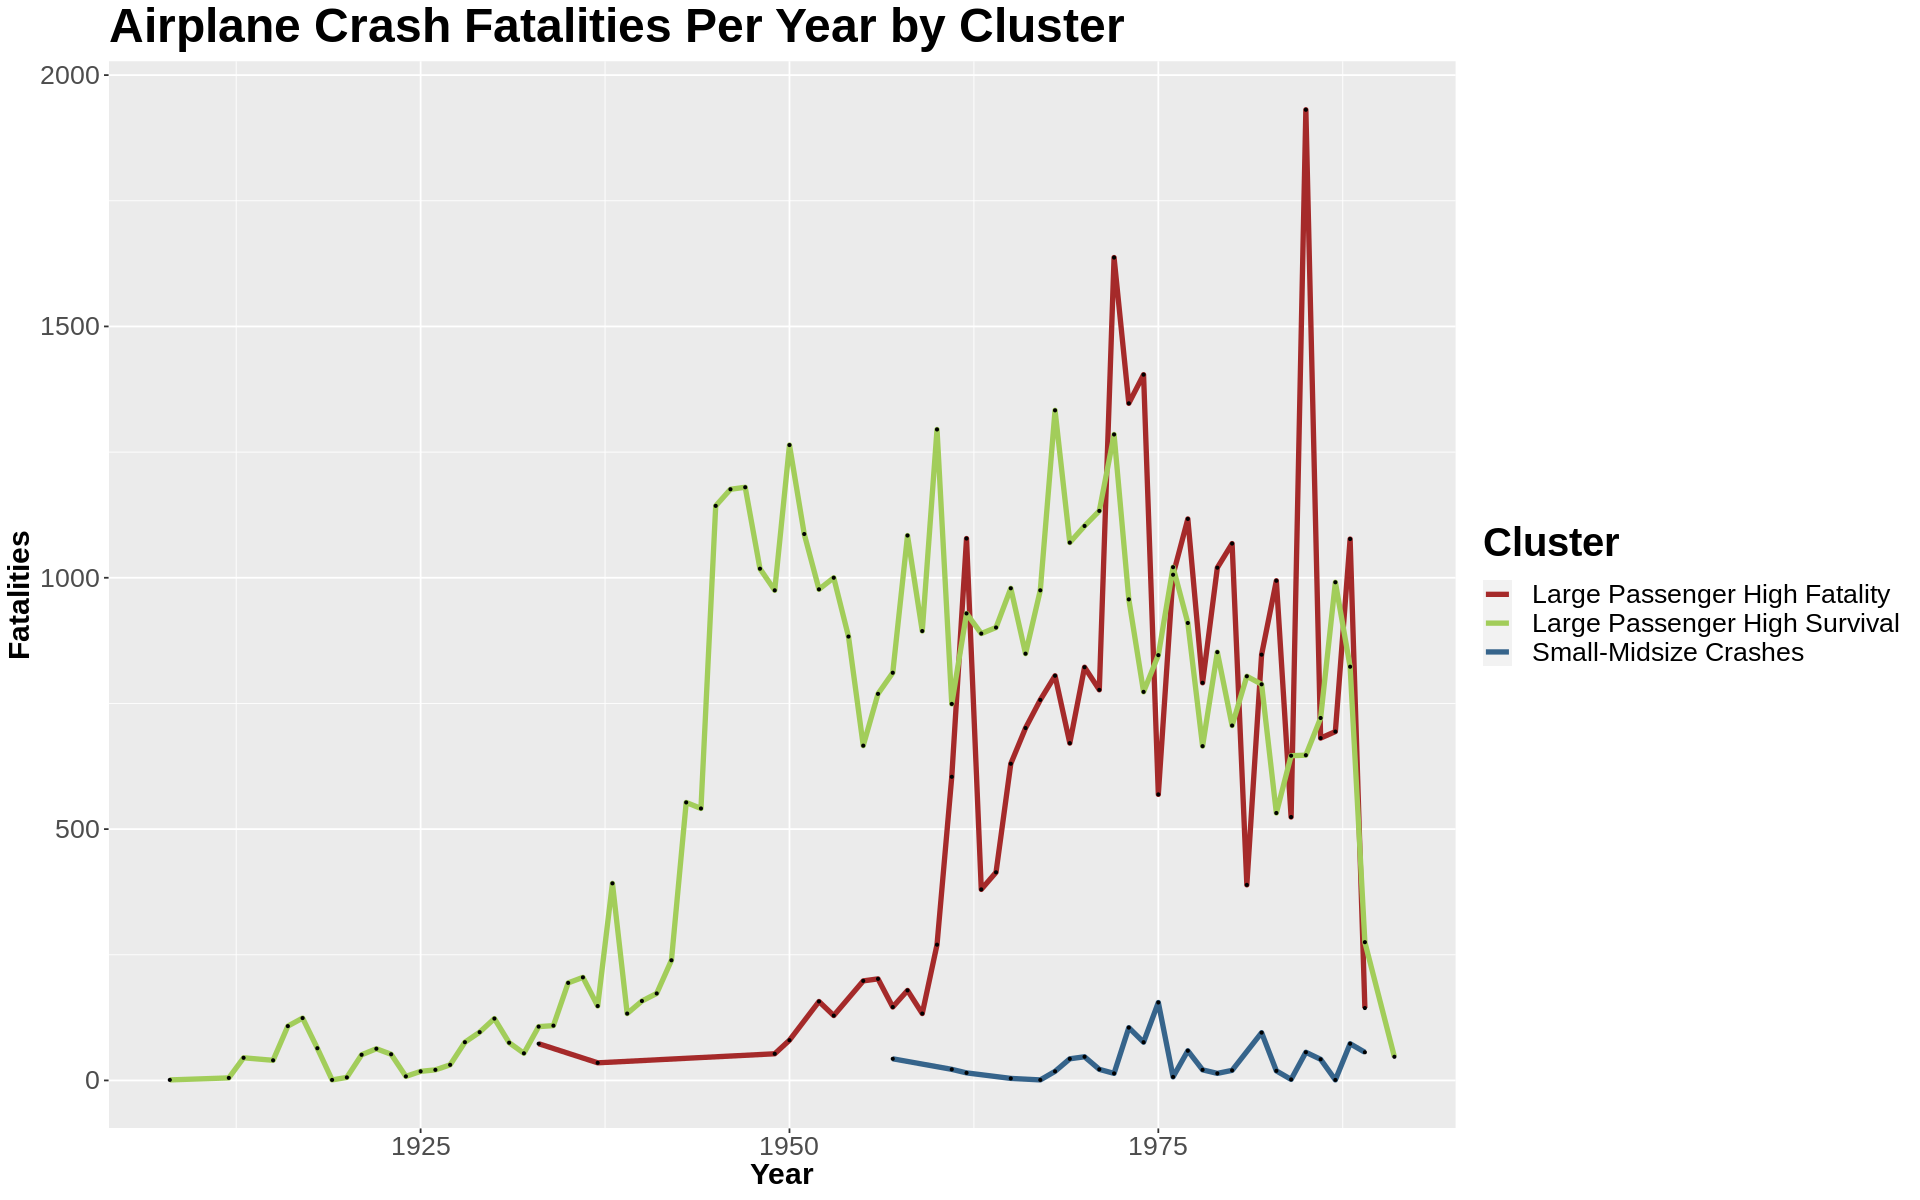

In [ ]:
# Aggregate Airplane Crash Fatalities per Year by Cluster groups
Fatalities <- aggregate(AirCrash$Fatalities,by=list(AirCrash$Year,AirCrash$ClustID),FUN =sum)
Fatalities <- Fatalities %>% dplyr::rename(Year = Group.1, ClusterID = Group.2, Deaths = x)

# Plot Travelers Aboard per Year by Cluster
fg(16,10)
K1FatalitiesPerYear = ggplot(Fatalities, aes(x=Year, y=Deaths, group = ClusterID )) +
                   geom_line(aes(colour=ClusterID), size = 1.5)  + geom_point(size = 0.5) +
                    scale_color_manual( "Cluster", values = alpha(c("brown","darkolivegreen3","steelblue4")))+
                    xlab("Year") + ylab("Fatalities") + ATheme +
                    ggtitle("Airplane Crash Fatalities Per Year by Cluster")

K1FatalitiesPerYear

#What percentage of annual plane crashes do each of these clusters represent ?

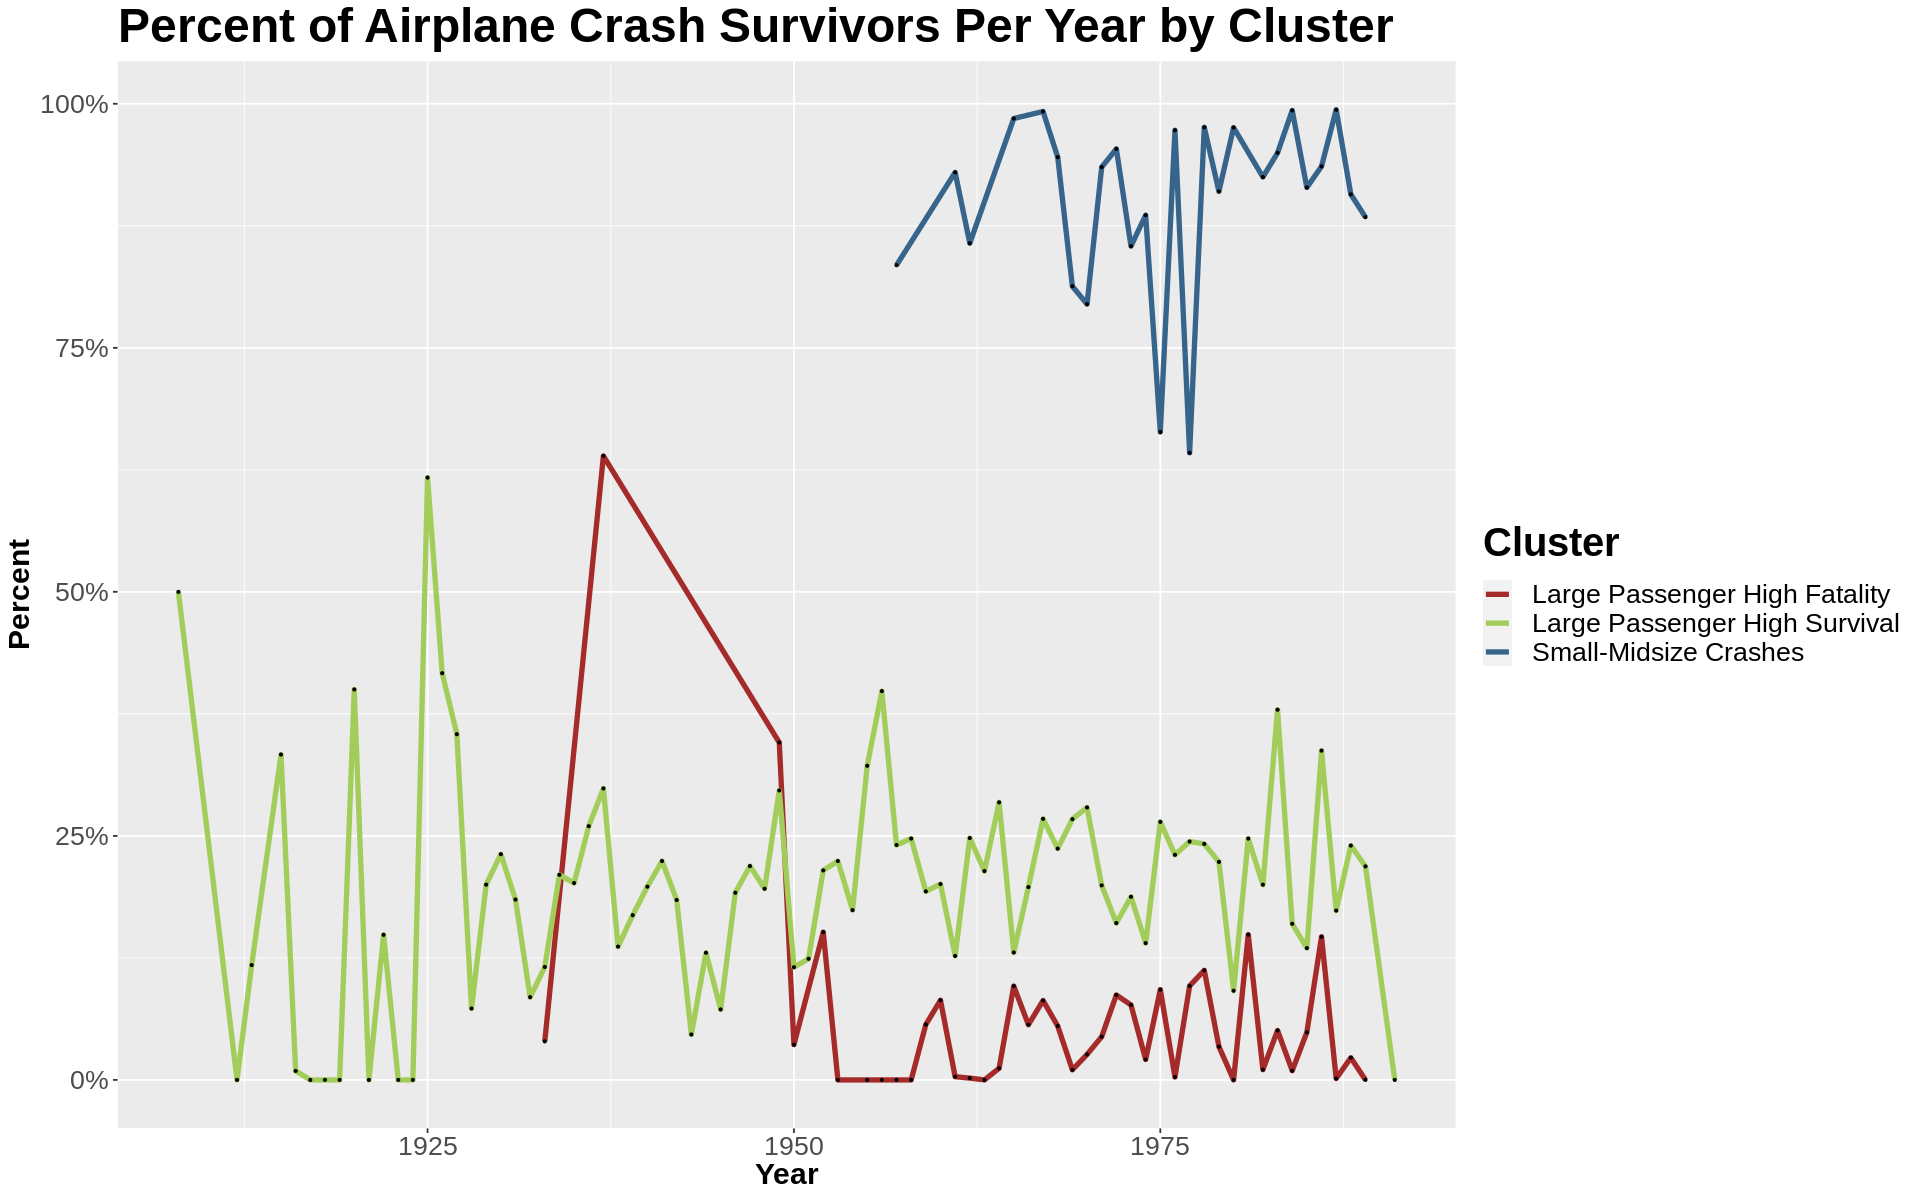

In [ ]:
# Aggregate Survivors and Aboard per Year by Cluster group
Survivors <- aggregate(AirCrash$Survivors,by=list(AirCrash$Year,AirCrash$ClustID),FUN =sum)
Survivors <- Survivors %>% dplyr::rename(Year = Group.1, ClusterID = Group.2, Survivors = x)
AC2 <- merge(Survivors, Aboard, by = c("Year","ClusterID"))


# Plot the Percent of Survivors per Year by Cluster
fg(16,10)
K1SurvivalRatePerYear = ggplot(AC2, aes(x=Year, y=Survivors/Travelers, group = ClusterID )) +
                   geom_line(aes(colour=ClusterID), size = 1.5)  + geom_point(size = 0.5) +
                    scale_color_manual("Cluster", values = alpha(c("brown","darkolivegreen3","steelblue4")))+
                    xlab("Year") + ylab("Percent") + ATheme +   scale_y_continuous(labels = scales::percent)+
                    ggtitle("Percent of Airplane Crash Survivors Per Year by Cluster")

K1SurvivalRatePerYear

#Comparing Survival Rates on Large Passenger Planes
##What are the top ten large passenger plane crashes by aircraft model and cluster?
> Of the three cluster groups, the big difference in survival rates between the "Large Passenger High Survival" cluster and "Large Plane High Fatality" cluster begs the question,"Why...?" Let's explore how aircraft model, airline operator, month, daypart and local hour may play a role in survival outcomes.




In [ ]:
# Move the Large Plane data into 2 data frames representing each large plane groups
LgSurvive <- AirCrash[AirCrash$ClustID == "Large Passenger High Survival",]
LgFatal <- AirCrash[AirCrash$ClustID == "Large Passenger High Fatality",]

# Take the top 10 crashes by plane model for each group
Top10TypeSurvive <- top_n(dplyr::count(LgSurvive,Type, sort = TRUE), 10)
Top10TypeFatal <- top_n(dplyr::count(LgFatal, Type, sort = TRUE), 10)

# Take the top 10 crashes by operator for each group
Top10OperSurvive <- top_n(dplyr::count(LgSurvive,Operator, sort = TRUE), 10)
Top10OperFatal <- top_n(dplyr::count(LgFatal,Operator, sort = TRUE), 10)

Selecting by n

Selecting by n

Selecting by n

Selecting by n



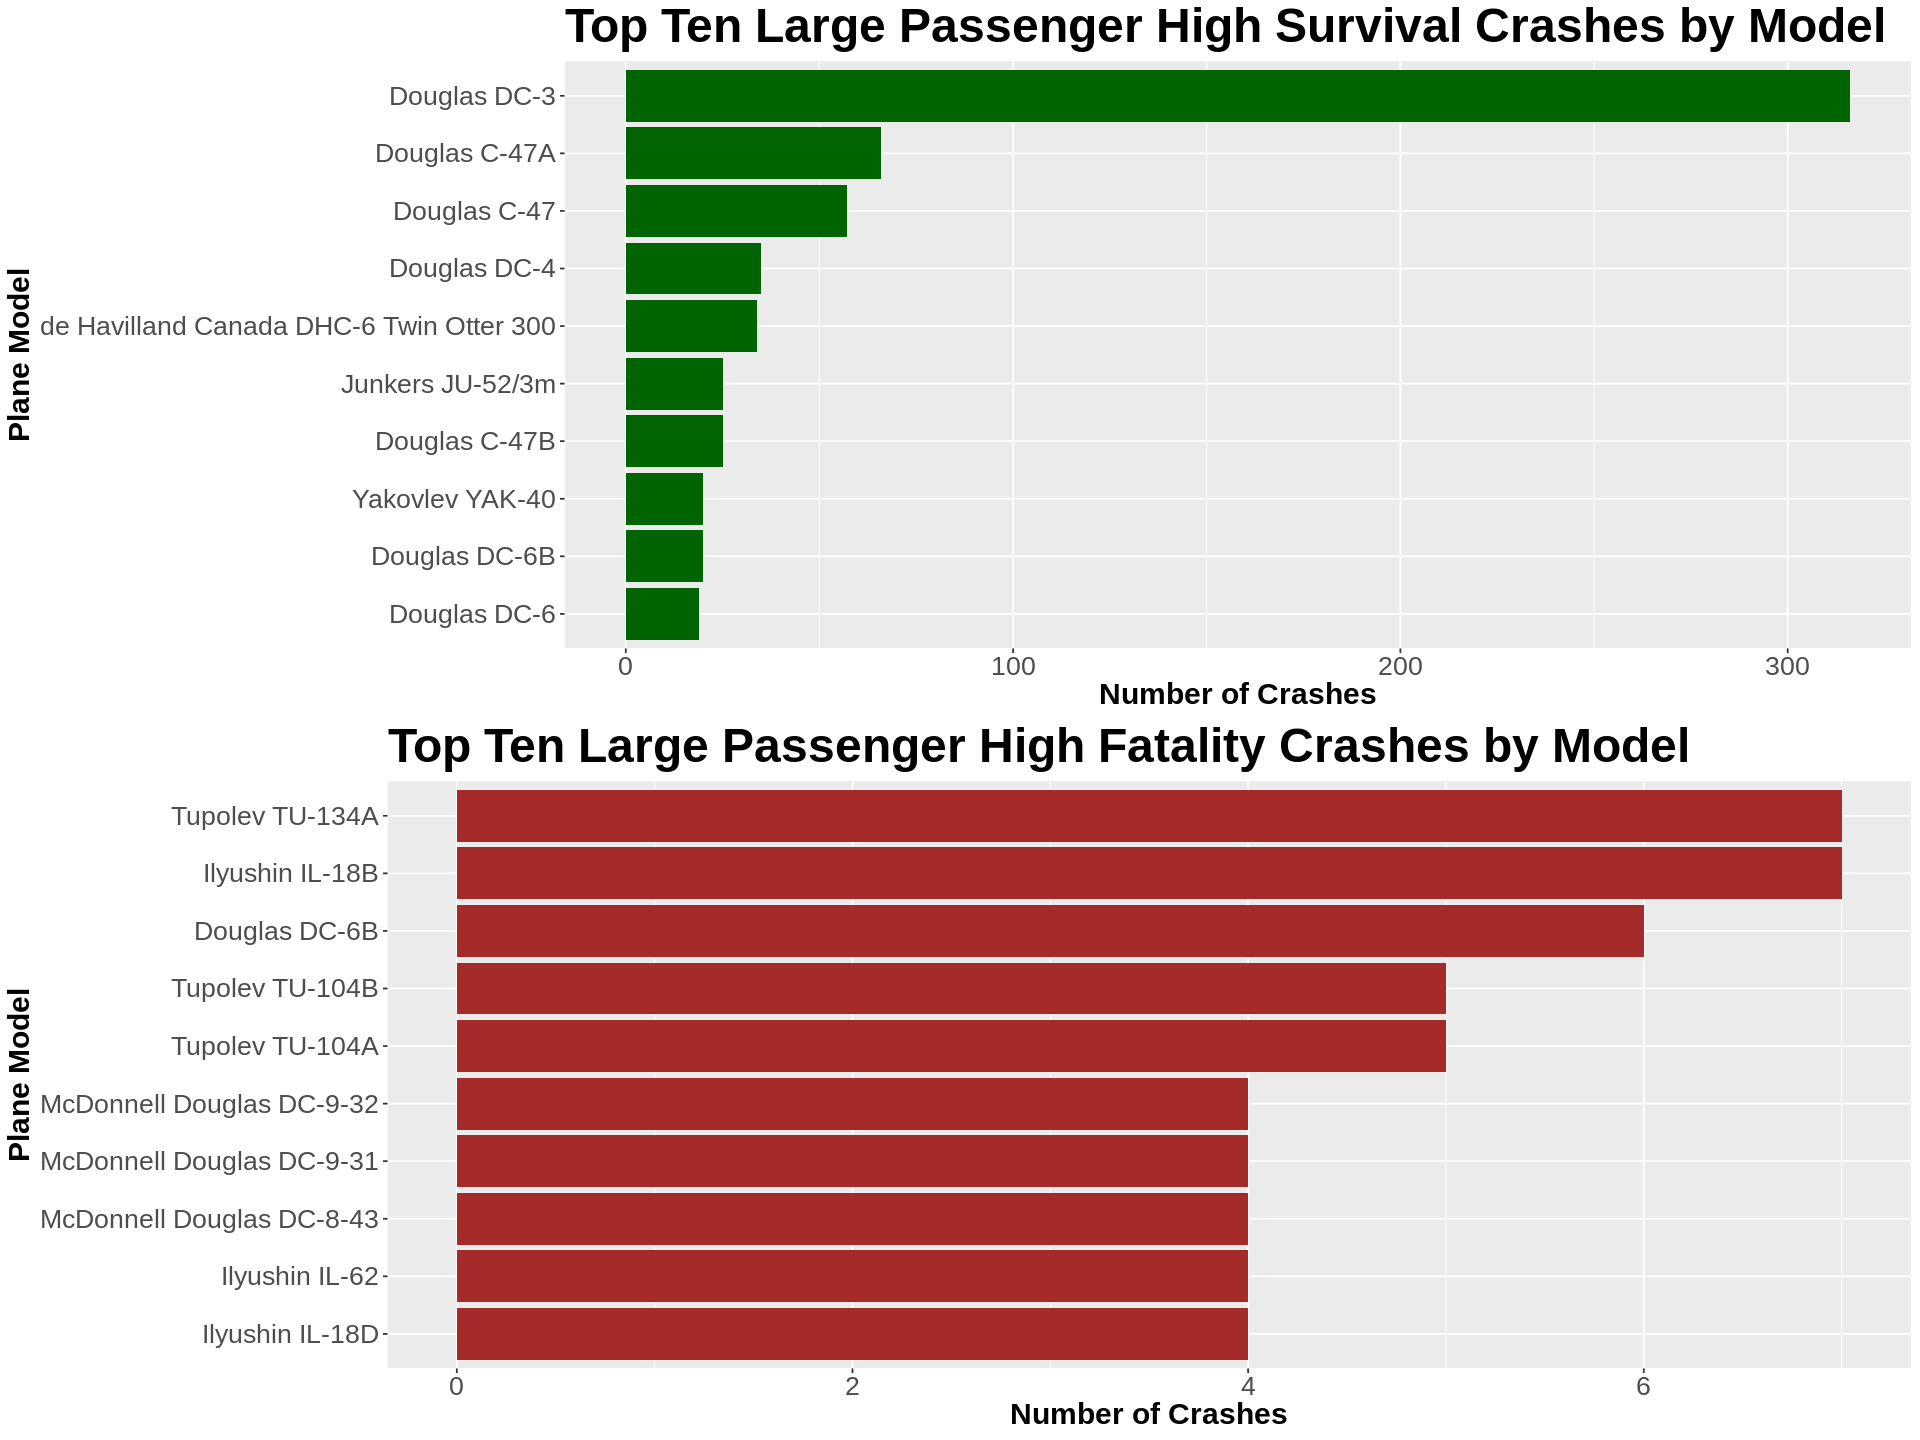

In [ ]:
fg(16,12)
# Plot the top ten crashes by plane model for each large plane cluster group
TypeSurvive <- ggplot(Top10TypeSurvive, aes(x=reorder(Type,n), y= n))+ geom_col(fill = "darkgreen") + 
                coord_flip() + ggtitle("Top Ten Large Passenger High Survival Crashes by Model") + 
               xlab("Plane Model") + ylab("Number of Crashes") + ATheme

TypeFatal <- ggplot(Top10TypeFatal, aes(x=reorder(Type,n), y= n))+ geom_col(fill = "brown") + 
                coord_flip() + ggtitle("Top Ten Large Passenger High Fatality Crashes by Model") + 
               xlab("Plane Model") + ylab("Number of Crashes") + ATheme

grid.arrange(TypeSurvive, TypeFatal)

#What are the top 10 large passenger plane crashes by airline operator and cluster?

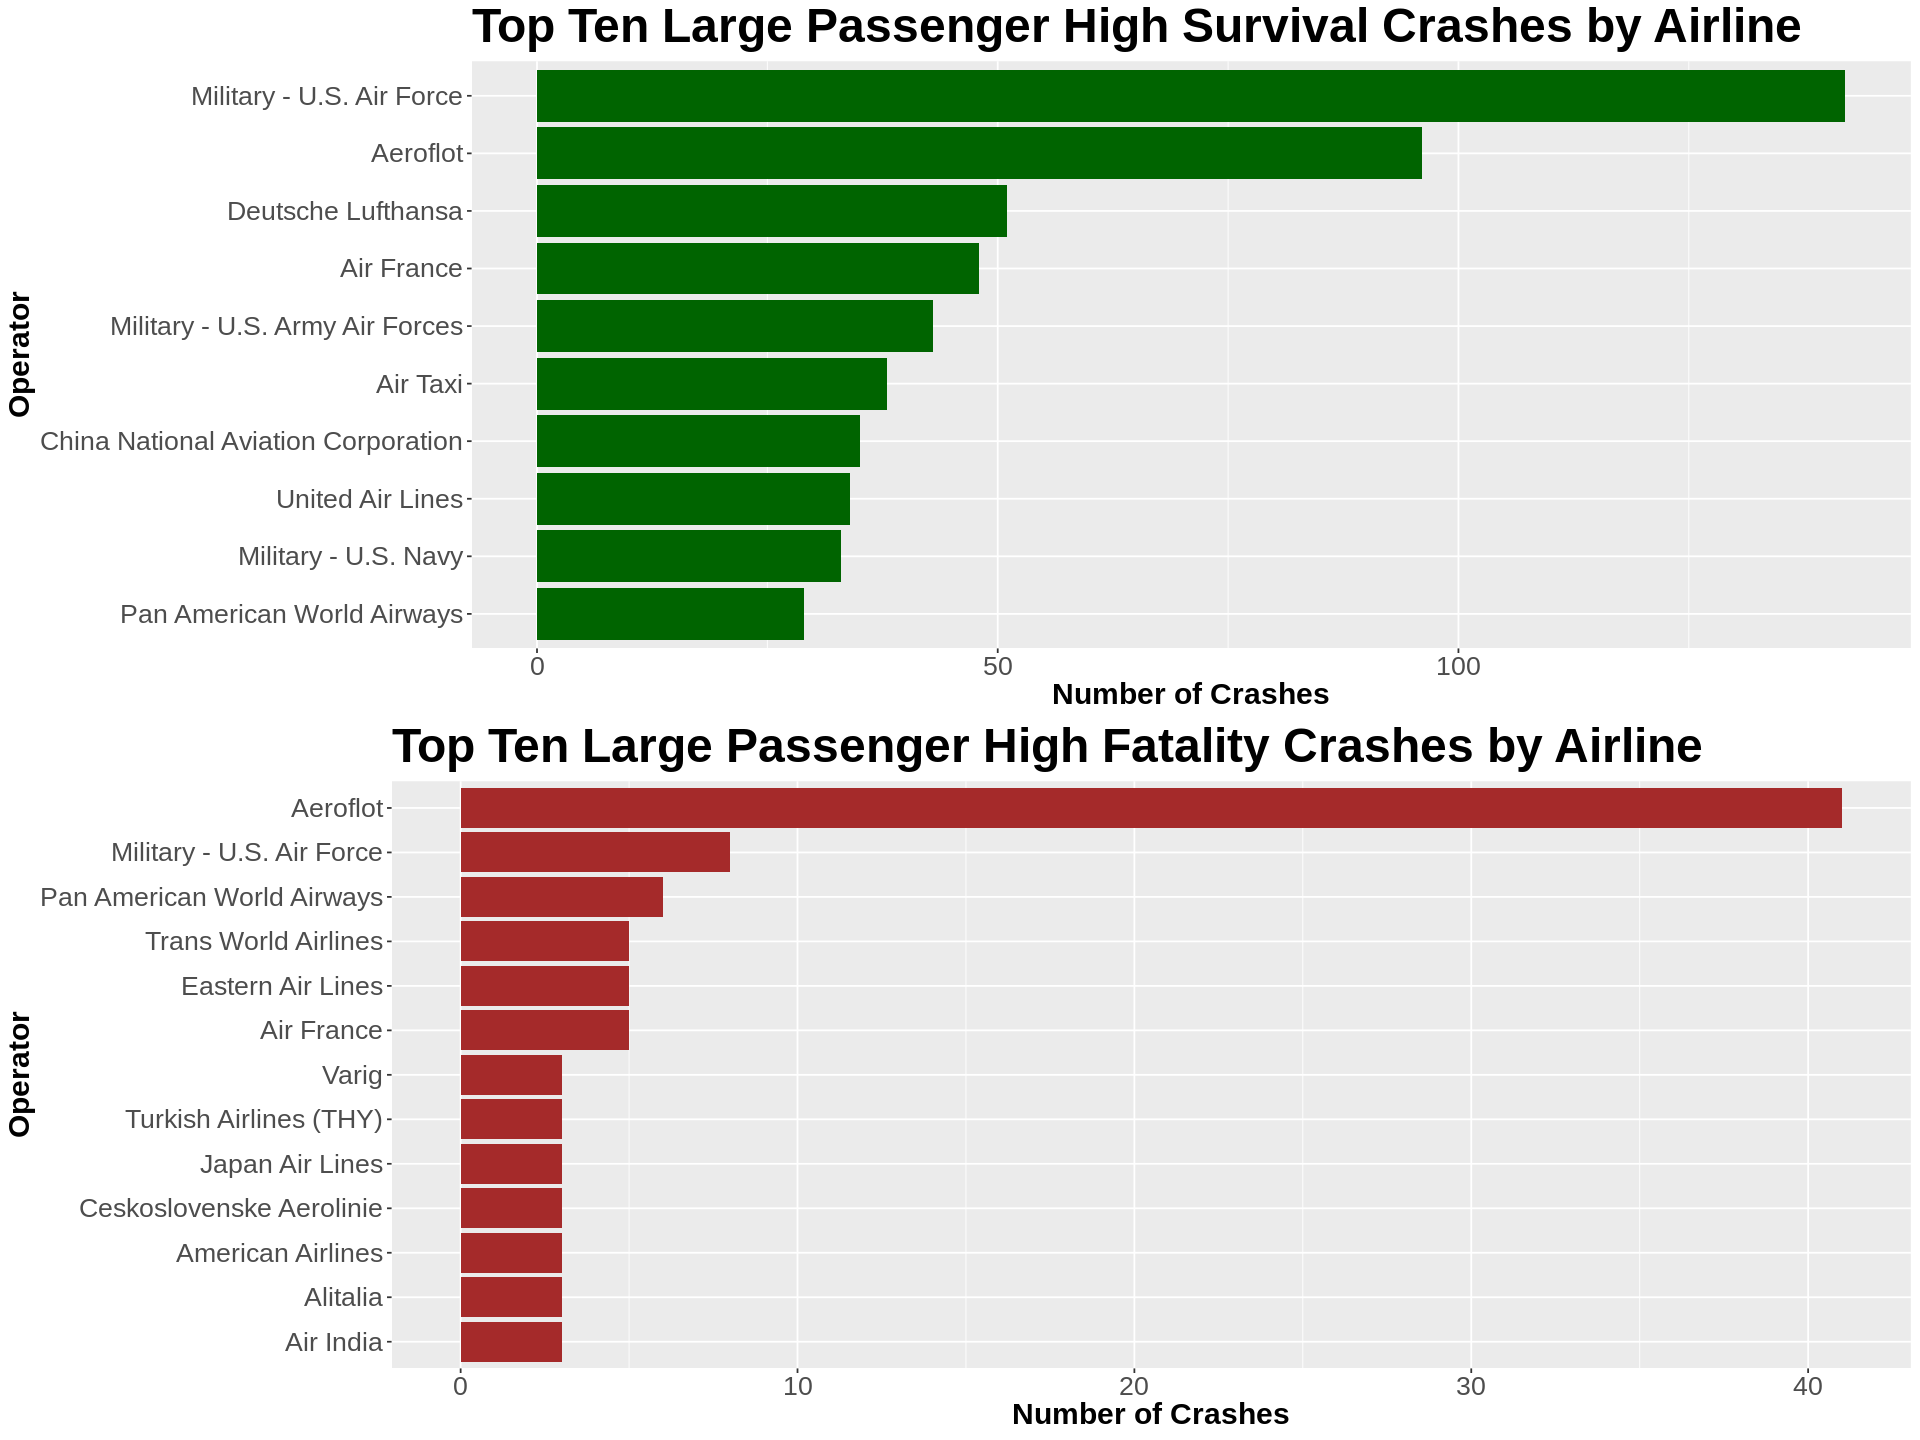

In [ ]:
fg(16,12)
# Plot the top ten crashes by plane model for each large plane cluster group
OperSurvive <- ggplot(Top10OperSurvive, aes(x=reorder(Operator,n), y= n))+ geom_col(fill = "darkgreen") + 
                coord_flip() + ggtitle("Top Ten Large Passenger High Survival Crashes by Airline") + 
               xlab("Operator") + ylab("Number of Crashes") + ATheme

OperFatal <- ggplot(Top10OperFatal, aes(x=reorder(Operator,n), y= n))+ geom_col(fill = "brown") + 
                coord_flip() + ggtitle("Top Ten Large Passenger High Fatality Crashes by Airline") + 
               xlab("Operator") + ylab("Number of Crashes") + ATheme

grid.arrange(OperSurvive, OperFatal)

#Does crash month have an impact on surviving large passenger plane crashes?"

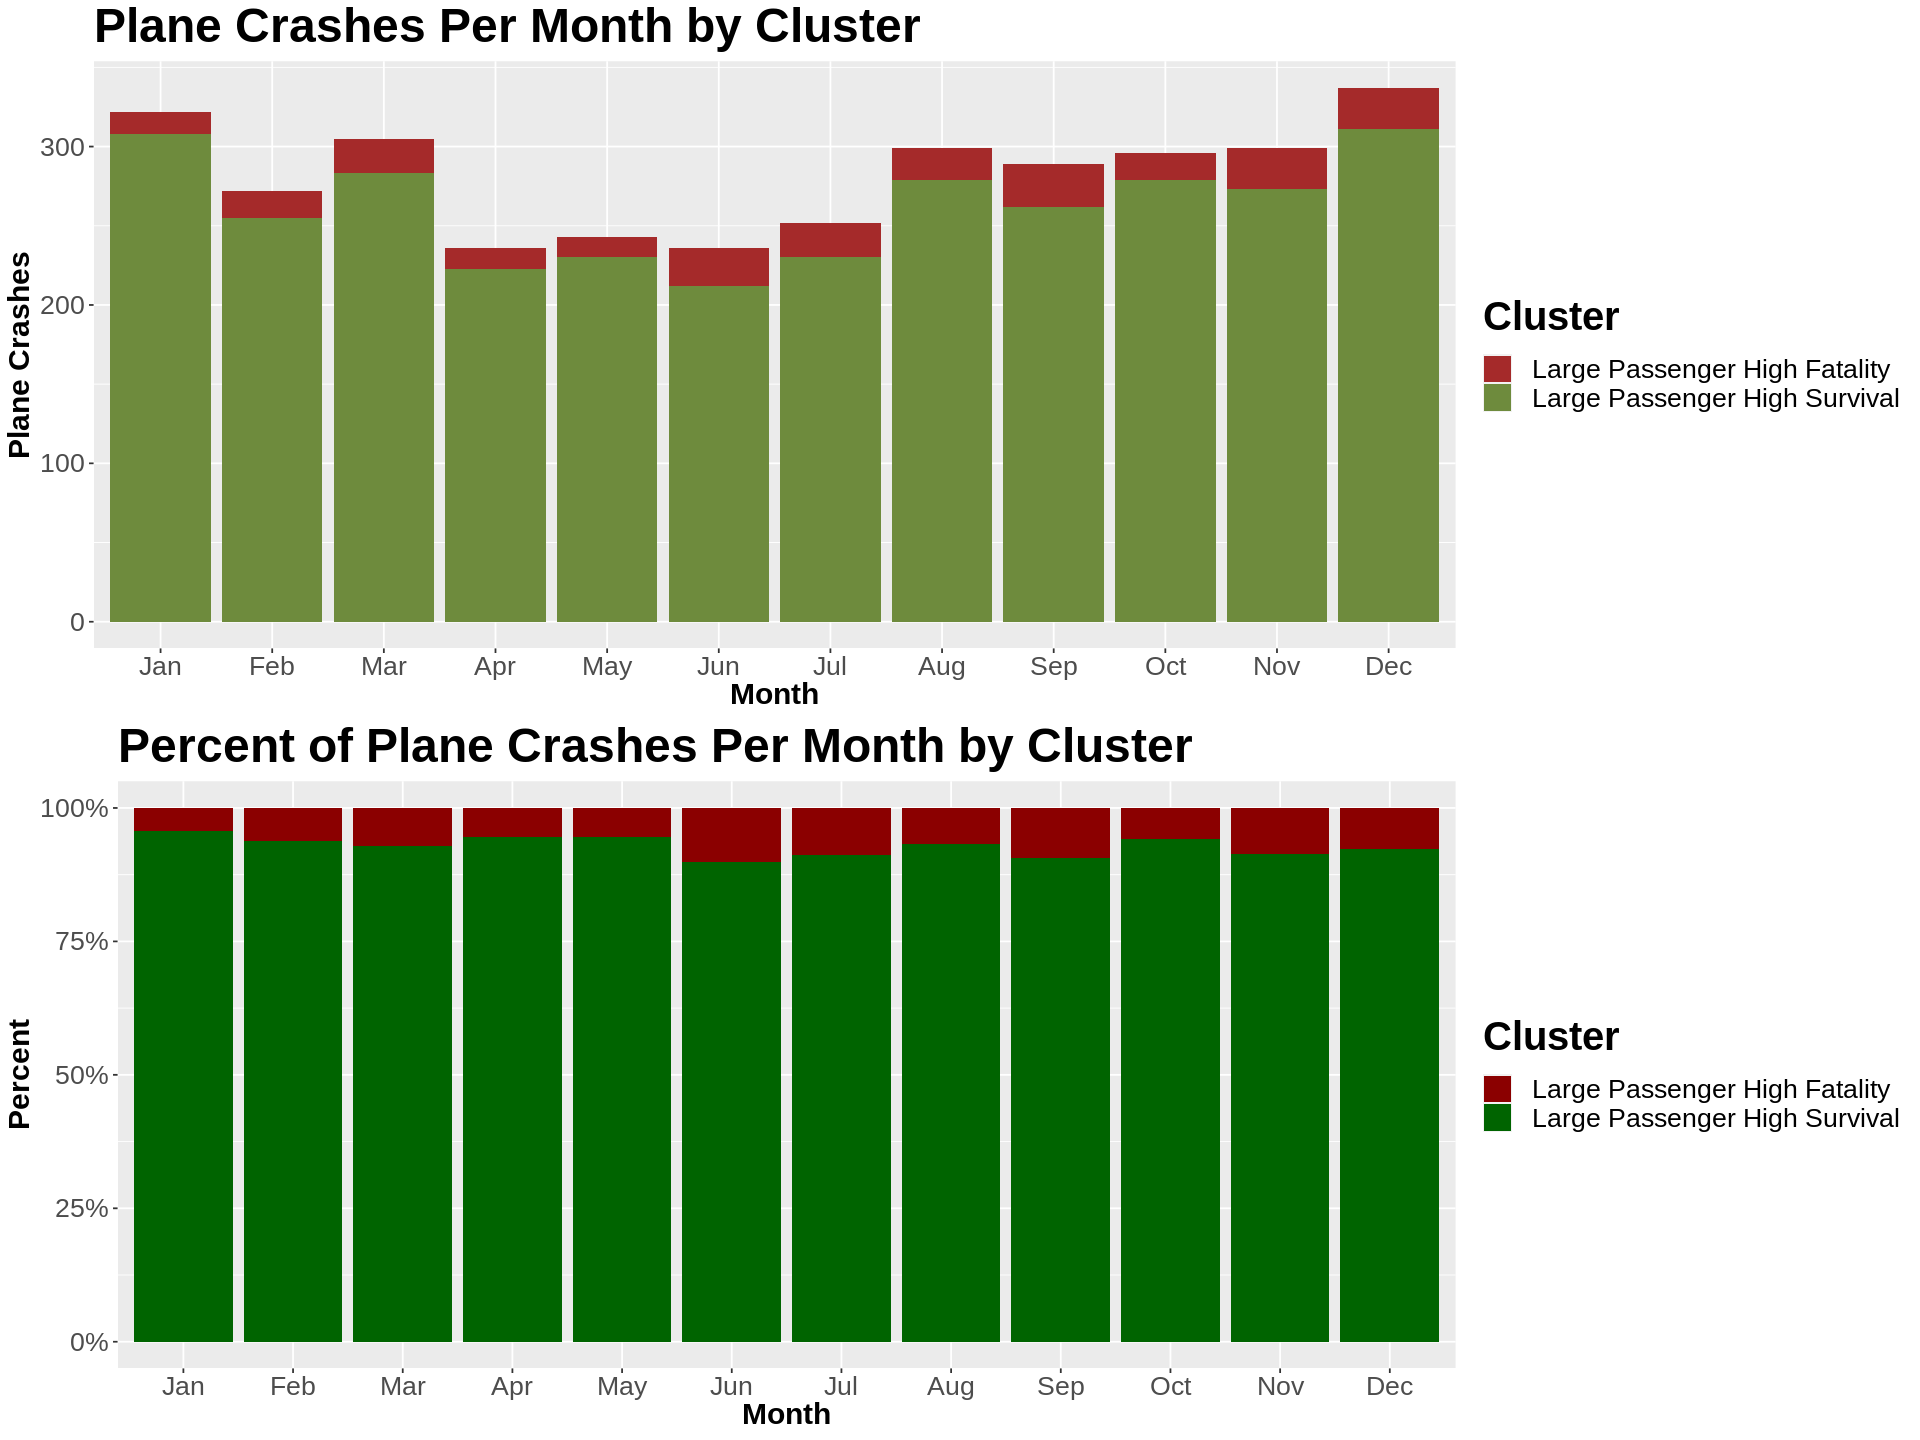

In [ ]:
LgAirCrash <- AirCrash[!AirCrash$ClustID == "Small-Midsize Crashes",]

fg(16,12)
# Plot Plane Crashes Per Month by ClusterID
K1CrashPerMonth <-  ggplot(LgAirCrash, aes(x=Month, fill = ClustID)) + geom_bar() + 
  xlab("Month") + ylab("Plane Crashes") + ggtitle("Plane Crashes Per Month by Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("brown","darkolivegreen4"))) + ATheme

K1CrashPercentMonth <-  ggplot(LgAirCrash, aes(x=Month, fill = ClustID)) + geom_bar(position = 'fill') + 
  xlab("Month") + ylab("Percent") + ggtitle("Percent of Plane Crashes Per Month by Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("darkred","darkgreen"))) + ATheme +
  scale_y_continuous(labels = scales::percent)

grid.arrange(K1CrashPerMonth, K1CrashPercentMonth)

#What part of the day do most large passenger plane crashes occur?
* Overnight = 0:00 to 5:59
* Morning = 6:00 to 11:59
* Daytime = 12:00 to 17:59
* Night = 18:00 to 23:59


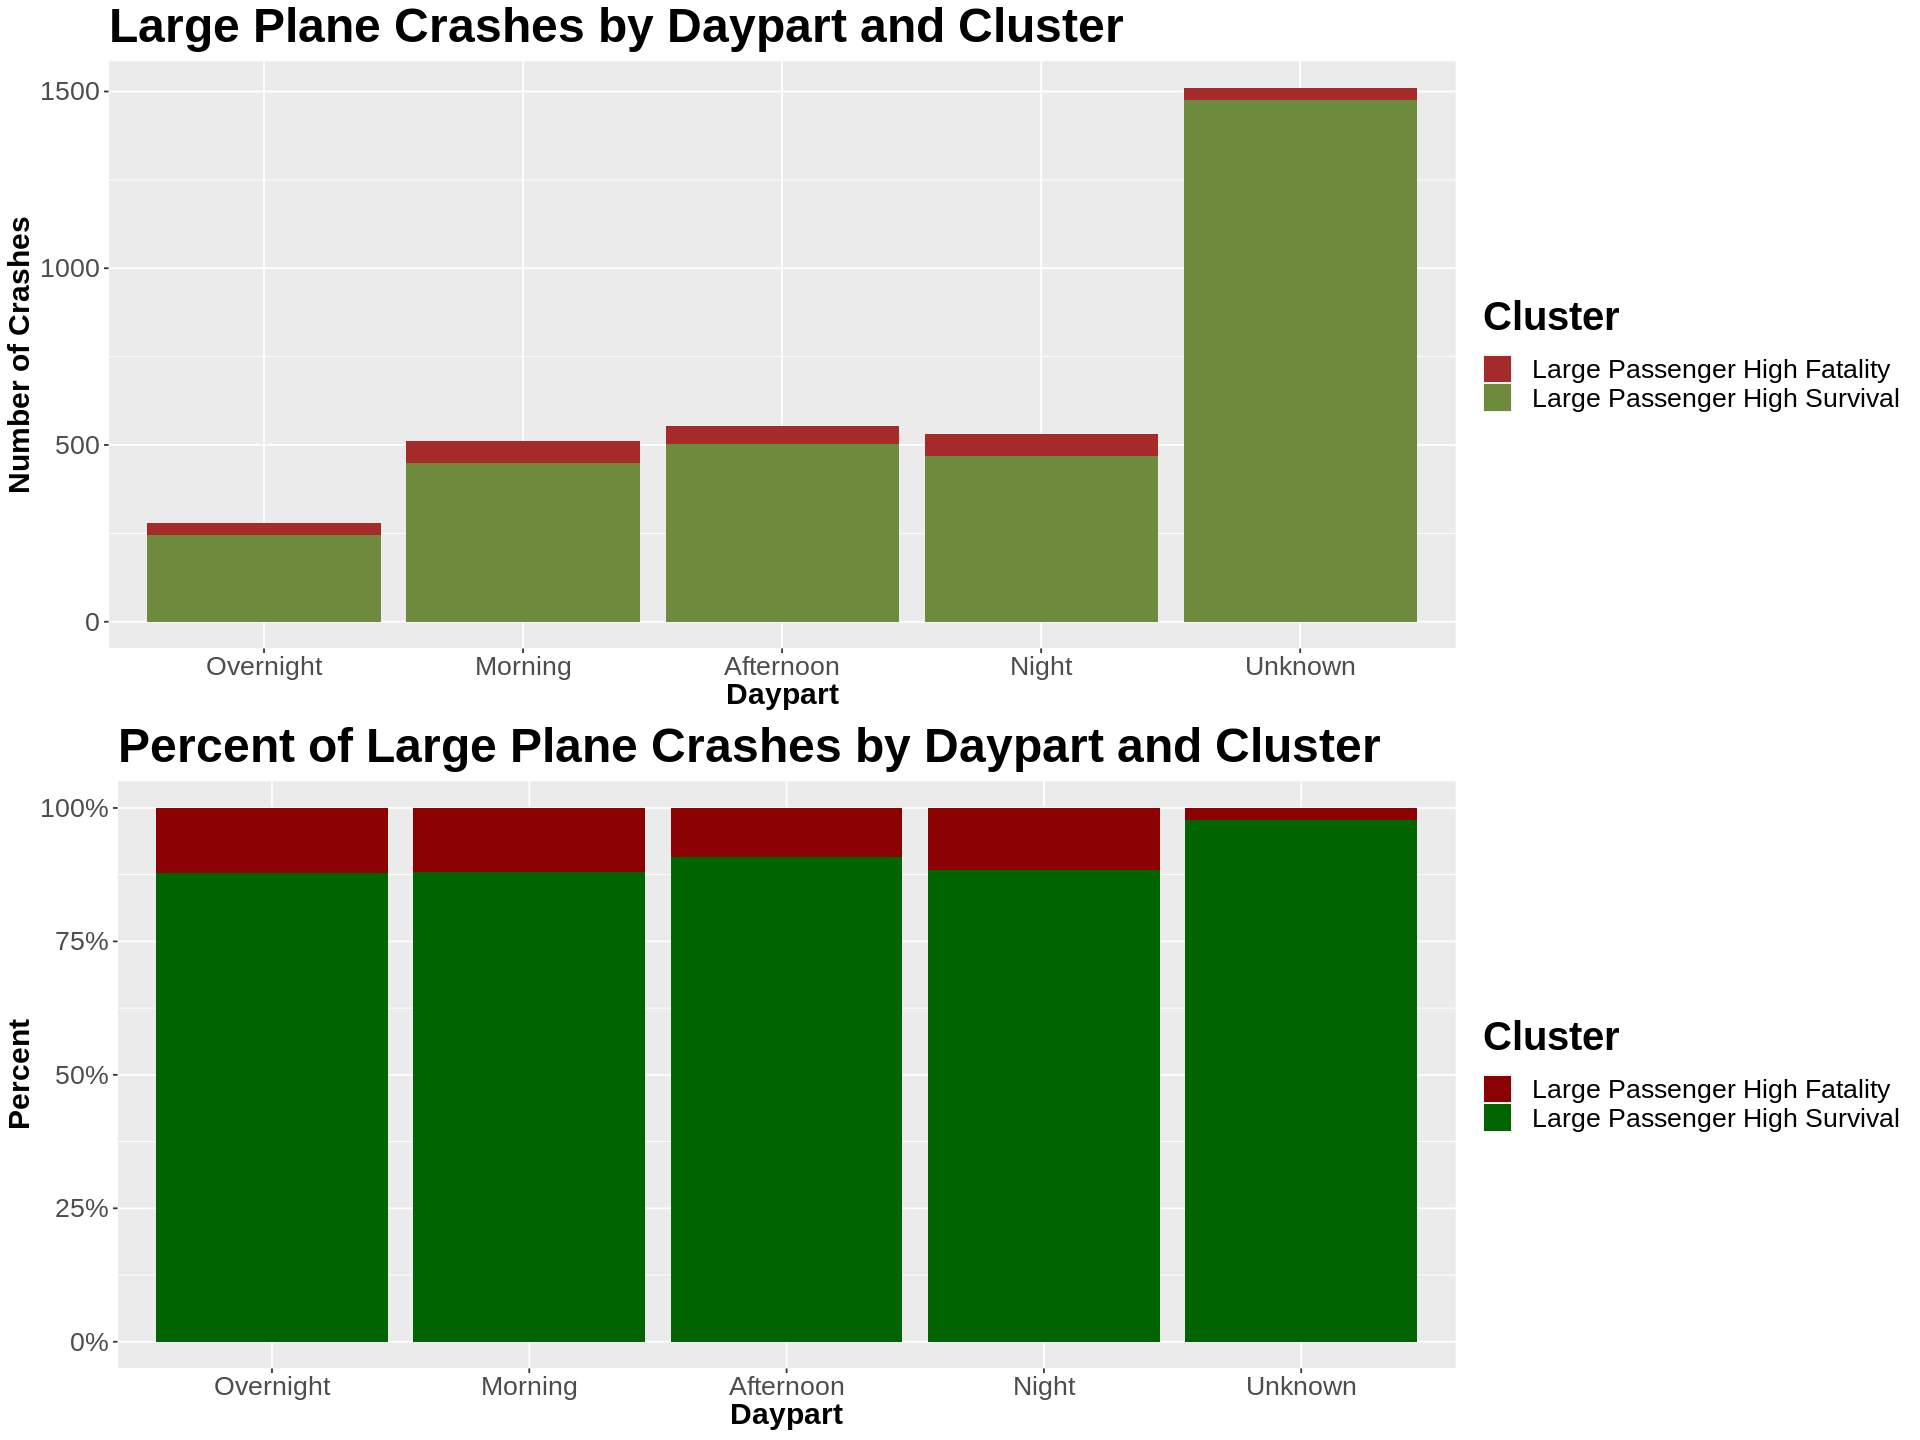

In [ ]:
# Plot Plane Crashes Per Daypart by ClusterID
K1CrashPerDaypart <-  ggplot(LgAirCrash, aes(x=Daypart, fill = ClustID)) + geom_bar() + 
  xlab("Daypart") + ylab("Number of Crashes") + ggtitle("Large Plane Crashes by Daypart and Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("brown","darkolivegreen4"))) + ATheme 

K1CrashPercentDaypart <-  ggplot(LgAirCrash, aes(x=Daypart, fill = ClustID)) + geom_bar(position = "fill") + 
  xlab("Daypart") + ylab("Percent") + ggtitle("Percent of Large Plane Crashes by Daypart and Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("darkred","darkgreen"))) + ATheme +
  scale_y_continuous(labels = scales::percent)

grid.arrange(K1CrashPerDaypart, K1CrashPercentDaypart)

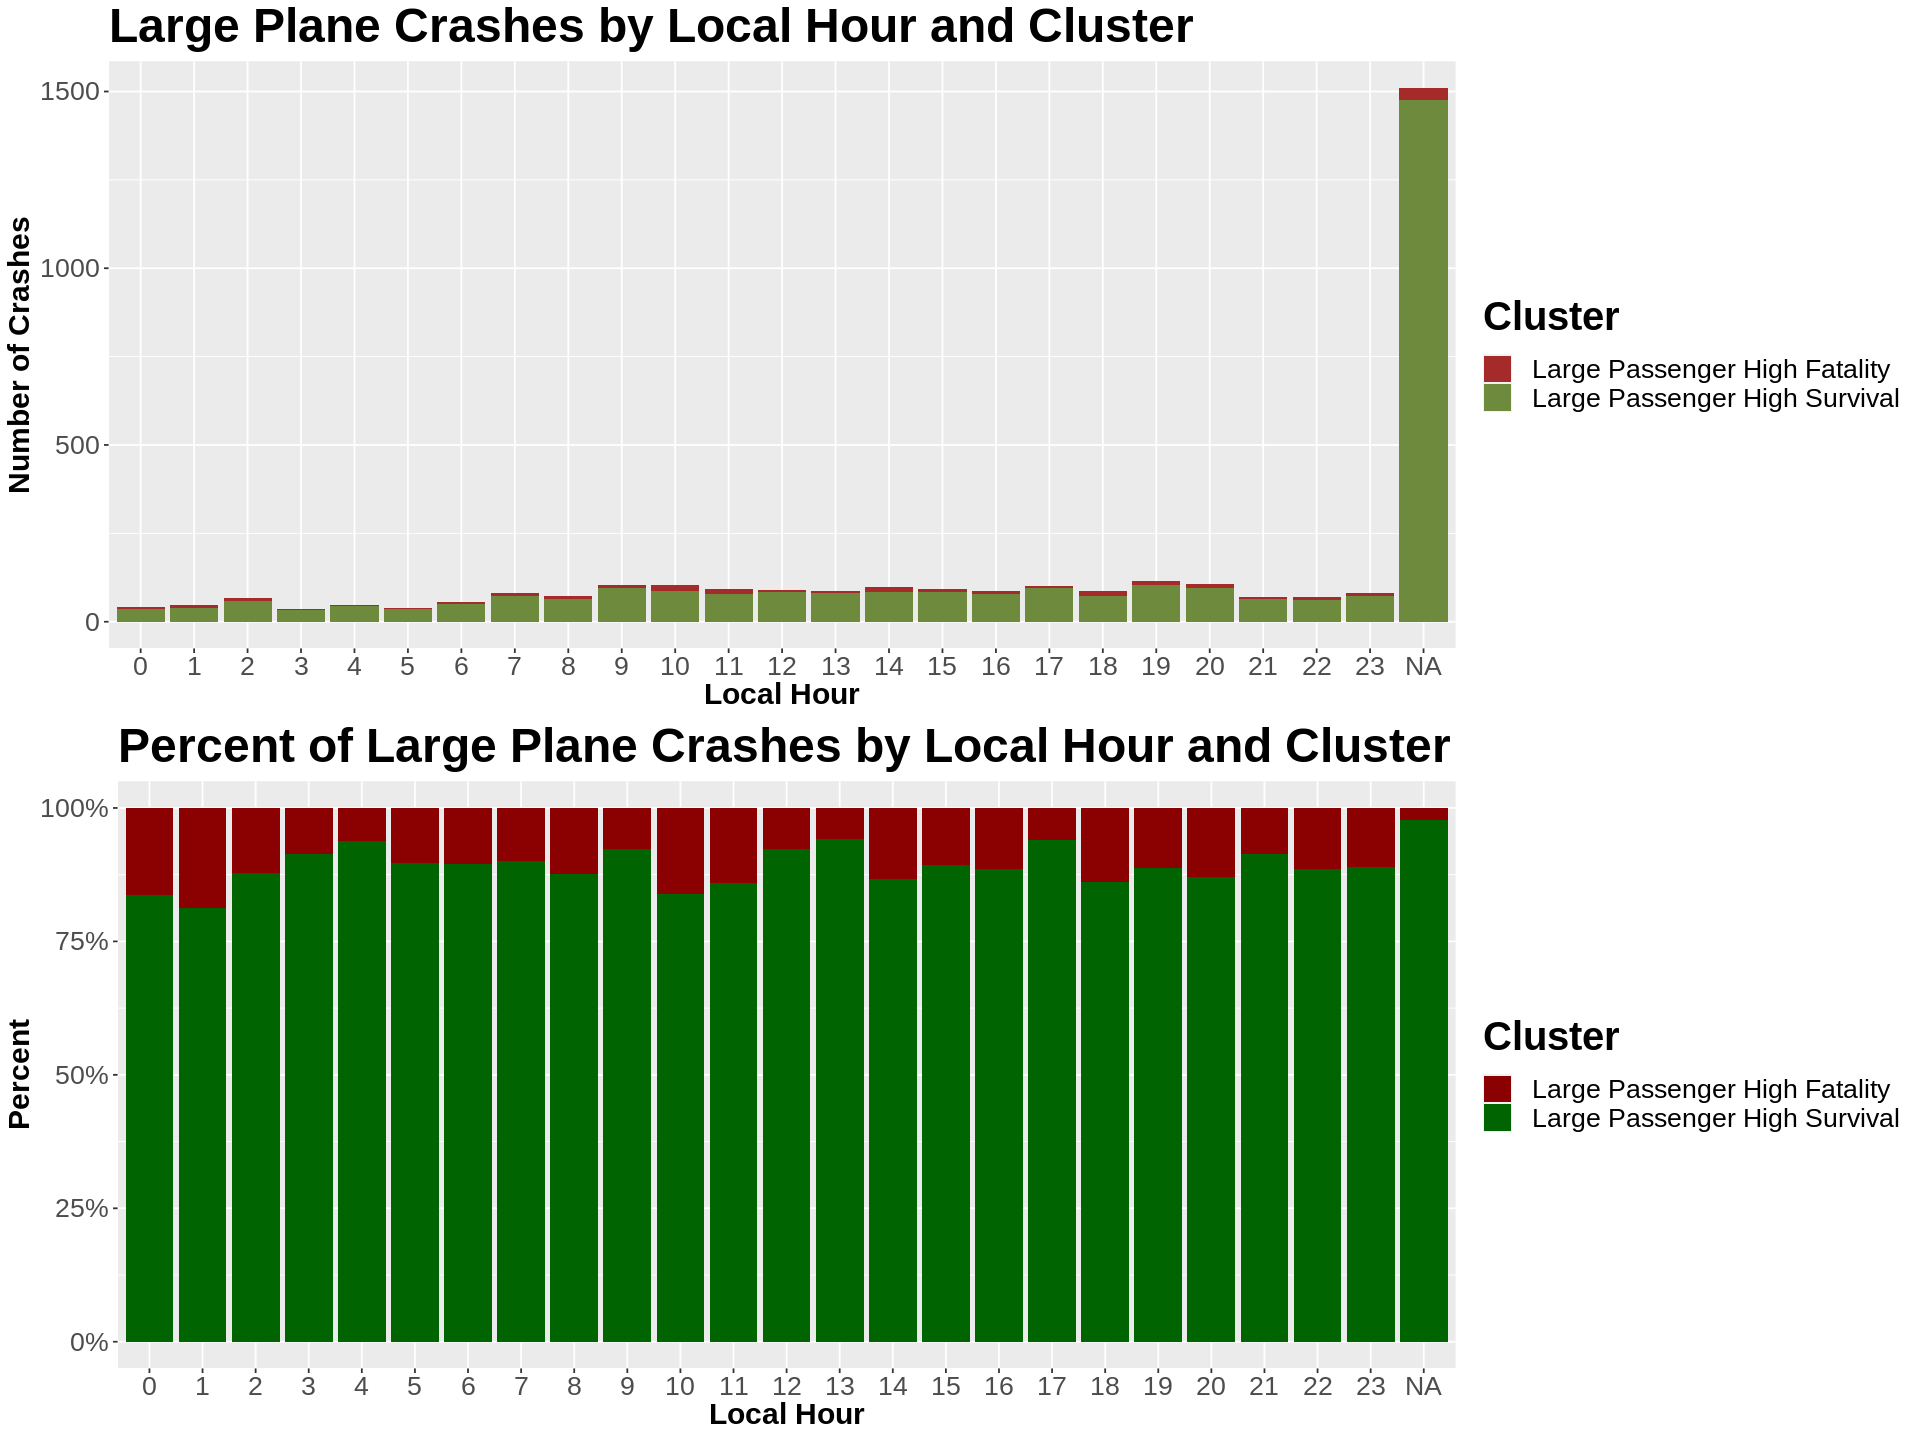

In [ ]:
LgAirCrash$LocalHour <- as.factor(LgAirCrash$LocalHour)

# Plot Plane Crashes Per Local Hour by ClusterID
K1CrashPerLocalHour <-  ggplot(LgAirCrash, aes(x=LocalHour, fill = ClustID)) + geom_bar() + 
  xlab("Local Hour") + ylab("Number of Crashes") + ggtitle("Large Plane Crashes by Local Hour and Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("brown","darkolivegreen4"))) + ATheme 

K1CrashPercentLocalHour <-  ggplot(LgAirCrash, aes(x=LocalHour, fill = ClustID)) + geom_bar(position = 'fill') + 
  xlab("Local Hour") + ylab("Percent") + ggtitle("Percent of Large Plane Crashes by Local Hour and Cluster") +
  scale_fill_manual("Cluster", values = alpha(c("darkred","darkgreen"))) + ATheme +
  scale_y_continuous(labels = scales::percent)

grid.arrange(K1CrashPerLocalHour, K1CrashPercentLocalHour)

#Insights

---




* The charts clearly shows that Small-Midsize Crashes involving planes with less than 102 occupants historically make up the bulk of plane crashes. Large passenger plane crashes averaging more than 120 occupants begin to appear in the 1950's.

* As expected large plane crashes with high survival rates ("Large Passenger High Survival") had the lowest annual fatalities.

* However, starting in the 1970's we also see how deadly large plane crashes represented by the "Large Passenger High Fatality" cluster (red line) begins to cause the most annual deaths.

* Small to midsize planes with less than 102 occupants made up 90% of all crashes from 1908 to 2009.

* Large passenger planes averaging 125 travelers aboard made up less than 25% of crashes each year.

* From 1970 onward, large passenger planes with high fatalities also tend to have more annual deaths than small to midsize crashes despite the fact that small to midsize planes represented more than 75% of crashes for any given year.


* In any given year small to midsize planes represented more than 75% of crashes.

* Large Passenger High Survival -- had survival rates averaging greater than 63% in any given year

* Large Passenger High Fatality -- had survival rates averaging below 30% in any given year

* Small-Midsize Crashes -- had survival rates that ranged from approximately 7% to 40% since 1960

* As the years progressed and large capacity planes increased, the annual number of travelers aboard large airplanes that crashed began to exceed the annual number of travelers aboard small to midsize planes that crashed. This is especially evident from the 1970's onward.


* American made McDonnell Douglas DC and Boeing 747 models appeared most frequently among the top 10 large passenger plane crashes with high survival rates.

* American McDonnell Douglas DC models and the Russian Tupolev and Ilyushin models made up the top 10 large passenger plane crashes with high fatalities.


* A wide mix of airlines make up the top ten list of large passenger plane crashes with high survival rates.

* The Russian Aeroflot airline stands out as the top large passenger plane crashes with high fatalities. At over 40 deadly crashes on record, Aeroflot has 4 times more deadly crashes than any other operator on the top ten list of large passenger plane crashes with high fatalities.


* The number of large passenger plane crashes per month appears to have higher frequencies (40+) in the summer months of July, August, September, and during the holiday months of November and December.

* Airplane crashes with high survival rates make up less than 40% of large passenger plane crashes for any given month with only April, June, November and December exceeding 25% of crashes.

* Unfortunately there are over 60 large passenger plane crashes with unreported time of crash.
*    Majority of crashes with reported times occurred during afternoons and nights.
*    Percent of large passenger plane crashes with high survival rates were lowest during overnight and night flights.

*   Unfortunately again there are over 60 large passenger plane crashes with unreported time of crash.
*    Local hours with more than 20 crash occurrences were at 10am, 11am, 2pm, 3pm, 4pm, 6pm, 7pm and 8pm.
*    Percent of large passenger plane crashes with high survival rates were highest at 8am, 9am, 12pm, 1pm, 4pm and 5pm.
*    All recorded large plane crashes that occurred at midnight and 5am resulted in 100% fatality







##Implementation

---



*   Can be used by Commercial Aviation. 
*   Strategic Planing for AirForce(Military).
*   Can be used for Predicting the Average number of Survivors. 
*   Can be used for determing optimal Aviation Route.






  

##Possible Future Anlysis

---
Some further investigation can be made based on these results. For example, 

* Are the number of crashes per month impacted by greater air traffic during summer and holiday months ?
* Do weather conditions during these months play a role ? 
* Does visibility during overnight and night flights play a role in the survival rate of a crash ?
* What insights can crash site locations provide?



#ShortFall in Dataset


---


*  60 crashes in the data set did not report a time of crash which could impact the results for daypart and local hour crashes.